##**Análisis descriptivo e implementación de modelos de Machine Learning clásicos**##



###Instrucciones:

El notebook se puede ejecutar linealmente, sin embargo cuando se pasan las 58.311 imágenes por clases a diferentes carpetas se tarda unas horas en ejecutarse.

Los archivos utilizados en este notebook son los siguientes:
- test.csv
- train.csv
- BreedLabels.csv
- ColorLabels.csv
- state_labels.csv
- Velocidad de adopción por Estados.png
- train_images
- Imagenes_Org

Estos archivos están en la carpeta del drive llamada DATASET o se pueden consultar en el siguiente link de la competencia de Kaggle: https://www.kaggle.com/c/petfinder-adoption-prediction/data

##**Descripción general necesidad**##

Se selecciona una competencia de Kaggle donde el objetivo principal es predecir la velocidad de adopción de dos tipos de animales (Perro y Gato), esto ya que millones de animales callejeros sufren en las calles o son sacrificados en refugios. Si se puede encontrar un hogar, se pueden salvar la vida de estos animales y brindar felicidad a las familias que los adoptan.

Petfinder es una base de datos en línea con capacidad de búsqueda de animales que necesitan un hogar. También es un directorio de casi 11,000 refugios de animales y organizaciones de adopción. Es una plataforma de bienestar animal líder en Malasia desde 2008, con una base de datos de más de 150.000 animales.

Las tasas de adopción de animales se encuentran correlacionadas con los metadatos asociados a sus perfiles en línea, como el texto descriptivo y las características que se evidencian en las fotografías. 

En la competencia seleccionada a desarrollar el propósito es construir algoritmos para predecir la adoptabilidad de las mascotas, específicamente, la velocidad de adopción de estas.



**Link competencia Kaggle:** https://www.kaggle.com/c/petfinder-adoption-prediction/overview

**Link plataforma petfinder:**https://www.petfinder.com/


##**1**. Lectura de los datos e importe de librerías 

El primer procedimiento realizado en el Notebook corresponde a la lectura de las librerías requeridas para el procesamiento de datos y la ejecución de los modelos de predicción

In [ ]:
#Intalando la librería sweetviz
!pip install sweetviz

In [ ]:
#Instalando lazypredict
!pip install lazypredict

In [ ]:
#Instalando versión de pandas 
!pip install pandas==1.1.0

In [ ]:
#Versión de la librería de pandas
pd.__version__

'1.1.0'

In [ ]:
#Instalando versión de folium
!pip install folium==0.2.1

In [ ]:
#Instalando versión de imgaug
!pip install imgaug==0.2.5

In [ ]:
#Importar librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
import warnings
warnings.filterwarnings("ignore")
import sweetviz as sv
import IPython
from sklearn.preprocessing import LabelEncoder
import lazypredict
from lazypredict.Supervised import LazyClassifier
from IPython.display import display
from PIL import Image

Se procede con la lectura de datos, para esto se plantea a través de Google Drive, esto considerando que el conjunto de datos completos son archivos muy pesados y la forma de poder manipularlos es a través de drive.

**Para realizar la lectura correcta de los datos se debe poner esta carpeta como acceso directo a la unidad personal.**

1. Ir a Google Drive
2. Hacer clic con el botón derecho en el archivo o la carpeta donde quieras crear el acceso directo.
3. Hacer clic en Añadir acceso directo a Drive.

In [ ]:
#Importando el drive al colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Importando el dataset de la carpeta del drive
!ls '/content/gdrive/My Drive/MONOGRAFIA/DATASET'

 breed_labels.csv		 petfinder-adoption-prediction.zip
 BreedLabels.csv		 PetFinder-BreedLabels.csv
'Clasificación imagenes.ipynb'	 PetFinder-ColorLabels.csv
 color_labels.csv		 PetFinder-StateLabels.csv
 ColorLabels.csv		 state_labels.csv
'Copia de BreedLabels.csv'	 StateLabels.csv
'Copia de ColorLabels.csv'	 test
'Copia de state_labels.csv'	 test_sentiment
'Copia de StateLabels.csv'	 train
 fc9cf8b8d-1.jpg		 train_images
 ImagenesMuestra		 train_metadata
 Imagenes_Org			 train_sentiment


Los datos no es posible cargarlos con el API de Kaggle por la cantidad de archivos que contiene y tampoco es posible a través del GithUb porque solo carga 1000 datos de un archivo y tenemos más de 58.000 datos incluyendo los tipo json e imágenes.

In [ ]:
#Lectura de los datos para testeo del modelo
test = pd.read_csv('/content/gdrive/My Drive/MONOGRAFIA/DATASET/test/test.csv') 
test.head(5)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt
0,2,Dopey & Grey,8,266,266,1,2,6,7,1,1,1,1,2,1,2,0,41326,2ece3b2573dcdcebd774e635dca15fd9,0,"Dopey Age: 8mths old Male One half of a pair, ...",e2dfc2935,2.00
1,2,Chi Chi,36,285,264,2,1,4,7,2,3,1,1,1,2,1,0,41326,2ece3b2573dcdcebd774e635dca15fd9,0,"Please note that Chichi has been neutered, the...",f153b465f,1.00
2,2,Sticky,2,265,0,1,6,7,0,2,2,1,1,2,1,1,200,41326,e59c106e9912fa30c898976278c2e834,0,"Sticky, named such because of his tendency to ...",3c90f3f54,4.00
3,1,Dannie & Kass [In Penang],12,307,0,2,2,5,0,2,2,1,1,1,1,2,0,41326,e59c106e9912fa30c898976278c2e834,0,Dannie and Kass are mother and daughter. We en...,e02abc8a3,5.00
4,2,Cuddles,12,265,0,1,2,3,7,2,2,1,1,1,1,1,0,41326,e59c106e9912fa30c898976278c2e834,0,"Extremely cuddly cat, hence the origin of his ...",09f0df7d1,5.00


In [ ]:
#Lectura del archivo de datos para el entrenamiento
train = pd.read_csv('/content/gdrive/My Drive/MONOGRAFIA/DATASET/train/train.csv') 
train.head(5)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.00,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.00,0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.00,3
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.00,2
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.00,2


In [ ]:
#Concatenación de los datos de entrenamiento y test
train['dataset_type'] = 'train'
test['dataset_type'] = 'test'
all_data = pd.concat([train, test])
all_data.head(5)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,dataset_type
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.00,2.00,train
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.00,0.00,train
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.00,3.00,train
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.00,2.00,train
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.00,2.00,train


In [ ]:
#Descripción de variables de los datos de entrenamiento
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13736 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

Revisando la completitud de la base de datos para la manipulación de cara al modelo con el cual realizar la predicción, se revisa la nulidad de datos, con esta exploración se encuentra se determina que no hay datos nulos en la base de datos de entrenamiento.

In [ ]:
#Descripción de variables de los datos del test
test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3972 entries, 0 to 3971
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Type          3972 non-null   int64  
 1   Name          3561 non-null   object 
 2   Age           3972 non-null   int64  
 3   Breed1        3972 non-null   int64  
 4   Breed2        3972 non-null   int64  
 5   Gender        3972 non-null   int64  
 6   Color1        3972 non-null   int64  
 7   Color2        3972 non-null   int64  
 8   Color3        3972 non-null   int64  
 9   MaturitySize  3972 non-null   int64  
 10  FurLength     3972 non-null   int64  
 11  Vaccinated    3972 non-null   int64  
 12  Dewormed      3972 non-null   int64  
 13  Sterilized    3972 non-null   int64  
 14  Health        3972 non-null   int64  
 15  Quantity      3972 non-null   int64  
 16  Fee           3972 non-null   int64  
 17  State         3972 non-null   int64  
 18  RescuerID     3972 non-null 

Revisando la completitud de la base de datos para la manipulación de cara al modelo con el cual realizar la predicción, se revisa la nulidad de datos, con esta exploración se encuentra se determina que no hay datos nulos en la base de datos de test.

In [ ]:
#Tipos de datos de las variables del dataset de entrenamiento
train.dtypes

Type               int64
Name              object
Age                int64
Breed1             int64
Breed2             int64
Gender             int64
Color1             int64
Color2             int64
Color3             int64
MaturitySize       int64
FurLength          int64
Vaccinated         int64
Dewormed           int64
Sterilized         int64
Health             int64
Quantity           int64
Fee                int64
State              int64
RescuerID         object
VideoAmt           int64
Description       object
PetID             object
PhotoAmt         float64
AdoptionSpeed      int64
dataset_type      object
dtype: object

Las variables que componen la base de datos en mayor proporción corresponden a datos enteros numéricos de clasificación, estas variables son tipo de mascota (Type), raza (Breed1 - Breed2), color(Color1 - Color2 - Color3), tamaño del animal(MaturitySize) , pelaje del animal (FurLength), si se encuentra vacunado(Vaccinated), desparasitado (Dewormed) y estirilizado(Sterilized), condición de salud(Health) y estado(State).

Las variables numéricas de tipo enteras son edad, cantidad de mascotas (Quantity), tarifa de adopción (Fee), cantidad de videos en el perfil (VideoAmt) y cantidad de fotos en el perfil (PhotoAmt).

Las variables de tipo string corresponde al nombre de los animales del perfil (Name), el ID del rescatista del perfil (RescuerID), la descripción del perfil (Description) y el ID del perfil de la mascota (PetID).

In [ ]:
#Descripción de las variables cuantitativas de los datos de entrenamiento
train.describe() 

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00,14993.00
mean,1.46,10.45,265.27,74.01,1.78,2.23,3.22,1.88,1.86,1.47,1.73,1.56,1.91,1.04,1.58,21.26,41346.03,0.06,3.89,2.52
std,0.50,18.16,60.06,123.01,0.68,1.75,2.74,2.98,0.55,0.60,0.67,0.70,0.57,0.20,1.47,78.41,32.44,0.35,3.49,1.18
min,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,41324.00,0.00,0.00,0.00
25%,1.00,2.00,265.00,0.00,1.00,1.00,0.00,0.00,2.00,1.00,1.00,1.00,2.00,1.00,1.00,0.00,41326.00,0.00,2.00,2.00
50%,1.00,3.00,266.00,0.00,2.00,2.00,2.00,0.00,2.00,1.00,2.00,1.00,2.00,1.00,1.00,0.00,41326.00,0.00,3.00,2.00
75%,2.00,12.00,307.00,179.00,2.00,3.00,6.00,5.00,2.00,2.00,2.00,2.00,2.00,1.00,1.00,0.00,41401.00,0.00,5.00,4.00
max,2.00,255.00,307.00,307.00,3.00,7.00,7.00,7.00,4.00,3.00,3.00,3.00,3.00,3.00,20.00,3000.00,41415.00,8.00,30.00,4.00


Se calcula los estadísticos asociados a los datos númericos, en estas se observan comportamientos basados en las categorías que se tienen planteadas.

Observando las variables como edad, se observa que el promedio de edad de los perfiles de animales es de 10 años, pero tiene una desviación estándar alta, indica que es un valor variable, otra variable cuantitativa es la tarifa de adopción, en este se observa un promedio de 21, pero una desviación alta, lo que indica que los valores son muy variables.

In [ ]:
#Correlación de las variables cuantitativas de los datos de entrenamiento
train.corr() 

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
Type,1.00,-0.15,0.06,-0.04,0.06,0.10,0.25,0.20,-0.17,0.00,0.10,0.03,0.01,-0.01,0.04,-0.04,0.12,-0.01,0.05,-0.09
Age,-0.15,1.00,-0.31,-0.04,-0.12,0.09,-0.04,-0.05,0.09,0.15,-0.14,-0.05,-0.19,0.10,-0.11,0.09,0.02,-0.02,-0.08,0.10
Breed1,0.06,-0.31,1.00,-0.16,0.07,-0.04,-0.01,-0.00,-0.01,-0.11,0.05,0.01,0.05,-0.03,0.09,-0.19,-0.03,0.02,0.04,0.11
Breed2,-0.04,-0.04,-0.16,1.00,0.06,-0.02,0.00,0.04,0.05,0.11,0.01,-0.01,-0.01,-0.03,0.04,0.01,-0.04,0.00,0.05,-0.02
Gender,0.06,-0.12,0.07,0.06,1.00,-0.12,0.03,0.26,-0.09,-0.03,0.08,0.09,0.04,-0.05,0.49,-0.05,0.00,0.02,0.10,0.06
Color1,0.10,0.09,-0.04,-0.02,-0.12,1.00,-0.11,-0.28,-0.03,0.07,-0.02,-0.02,-0.04,0.02,-0.12,0.05,0.02,-0.01,-0.04,-0.04
Color2,0.25,-0.04,-0.01,0.00,0.03,-0.11,1.00,0.09,-0.07,-0.01,0.03,0.01,0.01,-0.00,0.02,-0.02,0.03,0.02,0.06,-0.04
Color3,0.20,-0.05,-0.00,0.04,0.26,-0.28,0.09,1.00,-0.05,0.01,0.05,0.05,0.04,-0.02,0.27,-0.02,0.01,0.02,0.10,-0.01
MaturitySize,-0.17,0.09,-0.01,0.05,-0.09,-0.03,-0.07,-0.05,1.00,0.10,-0.09,-0.07,-0.07,-0.01,-0.04,0.04,-0.06,0.02,0.02,0.05
FurLength,0.00,0.15,-0.11,0.11,-0.03,0.07,-0.01,0.01,0.10,1.00,-0.01,0.02,0.03,0.03,-0.04,0.16,-0.03,-0.01,-0.03,-0.09


Observando la matriz de correlación se observa que las variables que componen el conjunto de datos de entrenamiento no tienen una alta correlación con esta y varias indican una correlación negativa.

Esta matriz de correlación posiblemente no entregue la realidad de la relación ya que el Dataset tiene varias variables que se encuentran numéricas, pero en realidad son categóricas.



##**2**. Exploración de los datos 

In [ ]:
#Copia del dataset train, test y all_data
train2 = train.copy()
test2 = test.copy()
all_data2 = all_data.copy()

Se realizó una copia del conjunto de datos con el fin de realizar algunos gráficos en los cuales se requiere modificar los valores de las variables, con el fin de poder obtener gráficos categórizados.

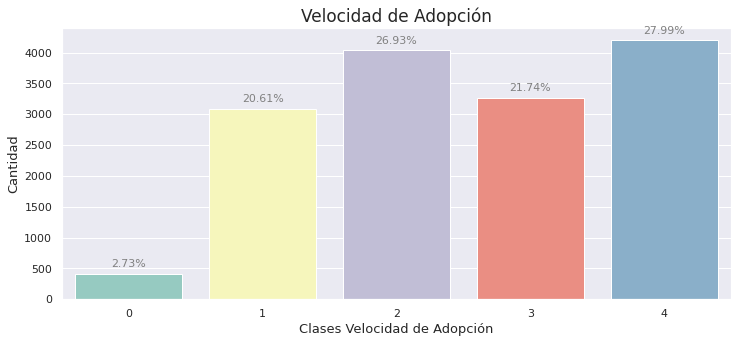

In [ ]:
#Gráfico del tipo de clases, su cantidad y velocidad de adopción
plt.figure(figsize= (12,5))
g = sns.countplot(x ='AdoptionSpeed', data = train, palette="Set3")
plt.title('Velocidad de Adopción', fontsize=17)
plt.xlabel('Clases Velocidad de Adopción', fontsize=13)
plt.ylabel('Cantidad', fontsize=13)
ax=g.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / train.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='gray', rotation=0, xytext=(0, 10),
         textcoords='offset points') 

La velocidad de adopción es la variable respuesta del modelo, es una variable categorica, donde:

0 corresponde a que la mascota fue adoptada el mismo día en que se incluyó en la lista.
1 corresponde a que la mascota fue adoptada entre 1 y 7 días (1ª semana) después de su inclusión en la lista.
2 corresponde a que la mascota fue adoptada entre 8 y 30 días (1er mes) después de su inclusión en la lista.
3 corresponde a que la mascota fue adoptada entre 31 y 90 días (segundo y tercer mes) después de haber sido incluida en la lista.
4 corresponde a que la adopción fue después de 100 días de estar en la lista.

Se evidencia que algunas mascotas fueron adoptadas de inmediato, pero esto corresponde a la menor proporción de los datos con una participación del 2.73%: esto puede ser resultado del hecho que alguien quería adoptar cualquier mascota, o la mascota tuvo la suerte de ser vista por una persona que quería dicho perfil de mascota. La generalidad es que las mascotas son adoptadas posterior a los 8 días de estar incluidas en la plataforma.

####**2.1** Tipo de Mascotas

In [ ]:
# Type
train['Type'].value_counts() # Conteo de valores 

1    8132
2    6861
Name: Type, dtype: int64

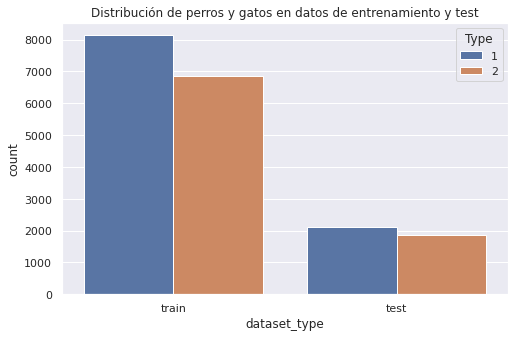

In [ ]:
#Gráfico de frecuencia de tipo de mascota para datos de entrenamiento y testeo
plt.figure(figsize = (8,5))
sns.countplot(x = 'dataset_type', data = all_data, hue ='Type')
plt.title('Distribución de perros y gatos en datos de entrenamiento y test');

Los datos de entrenamiento muestran que los perros representan una mayor cantidad en el DataSet, sin embargo, se muestra proporcional en los datos con respecto al tipo de animal, esto tanto para los datos de entrenamiento como de test.


In [ ]:
#Definición de funciones para gráficas de frecuencias
main_count = train['AdoptionSpeed'].value_counts(normalize=True).sort_index()
def prepare_plot_dict(df, col, main_count):
    main_count = dict(main_count)
    plot_dict = {}
    for i in df[col].unique(): #Valores unicos dependiendo de la variable que se quiere revisar (columna)
        val_count = dict(df.loc[df[col]==i,'AdoptionSpeed'].value_counts().sort_index()) #Se cuentan los valores unicos por rapidez de adopción
        
        for k, v in main_count.items():
            if k in val_count:
                plot_dict[val_count[k]] = (val_count[k] / sum(val_count.values()))*100
            else:
                plot_dict[0] = 0
    return plot_dict

def make_count_plot(df, x, hue ='AdoptionSpeed', title ='', main_count = main_count):
    g = sns.countplot(x = x, data = df, hue = hue)
    plt.title(f"Velocidad de adopción {title}")
    ax = g.axes
    
    plot_dict = prepare_plot_dict(df, x, main_count)
    
    for p in ax.patches:
        h = p.get_height() if str(p.get_height()) != 'nan' else 0
        text = f"{plot_dict[h]:.0f}%" if plot_dict[h] <0 else f"{plot_dict[h]:.0f}%"
        ax.annotate(text, (p.get_x() + p.get_width()/2., h),
                    ha ='center', va='center', fontsize = 11, color ='gray' if plot_dict[h]>0 else 'red',
                    rotation =0, xytext =(0,10),
                    textcoords = 'offset points')

In [ ]:
#Conteo de valores únicos de las clases de velocidad de adopción para los datos de entrenamiento
for i in train['dataset_type'].unique():
  val_count = dict(train.loc[train['dataset_type']==i,'AdoptionSpeed'].value_counts().sort_index())
  print(val_count)

{0: 410, 1: 3090, 2: 4037, 3: 3259, 4: 4197}


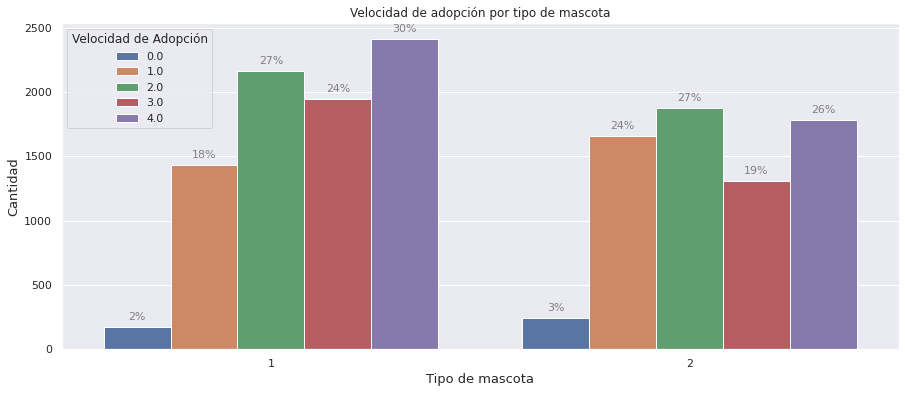

In [ ]:
#Gráfico de frecuencia de velocidad de adopción por tipo de mascota
plt.figure(figsize =(15,6))
make_count_plot(df = all_data.loc[all_data['dataset_type']=='train'], x = 'Type', title ='por tipo de mascota')
plt.xlabel('Tipo de mascota', fontsize=13)
plt.ylabel('Cantidad', fontsize=13)
plt.legend(title='Velocidad de Adopción');

Cuando se observa la velocidad de adopción por tipo de mascota se observa que para los perros el mayor porcentaje se encuentra representado en la adopción de mascotas superior a los 100 días, para los gatos el mayor porcentaje se encuentra representado en la adopción de mascotas entre 8 y 31 días.

Esto puede indicar que los gatos son adoptados en menor tiempo, sin embargo, las categorías de velocidad de adopción se muestran muy similares para un tiempo superior a 8 días, es decir, las categorías 2,3 y 4.

####**2.2** Nombre de las mascotas

In [ ]:
#Conteo de los 5 nombres más populares por clases de velocidad de adopción
print("Nombres mas populares de mascotas por velocidad de adopción")
for n in train['Name'].value_counts().index[:5]:
    print(n)
    print(train.loc[train['Name']==n,'AdoptionSpeed'].value_counts().sort_index())
    print("")

Nombres mas populares de mascotas por velocidad de adopción
Baby
0     2
1    11
2    15
3    11
4    27
Name: AdoptionSpeed, dtype: int64

Lucky
0     5
1    14
2    16
3    12
4    17
Name: AdoptionSpeed, dtype: int64

Brownie
0     1
1    11
2    14
3    12
4    16
Name: AdoptionSpeed, dtype: int64

No Name
0     3
1    14
2    11
3     6
4    20
Name: AdoptionSpeed, dtype: int64

Mimi
0     3
1    12
2    13
3     7
4    17
Name: AdoptionSpeed, dtype: int64



Se obtienen los resultados asociados a los nombres mas comunes y estos asociados a la velocidad de adopción de las mascotas.

El nombre mas común es Baby, le sigue Lucky, Brownie, sin nombre y Mimi.

In [ ]:
#Porcentajes de mascotas sin nombre para los datos de entrenamiento y test
train['Name'] = train['Name'].fillna('unnamed')
test['Name'] = test['Name'].fillna('unnamed')
all_data['Name'] = all_data['Name'].fillna('unnamed')

train['No_name'] = 0
train.loc[train['Name']=='unnamed','No_name'] = 1
test['No_name'] =0
test.loc[test['Name']=='unnamed','No_name'] = 1
all_data['No_name'] = 0
all_data.loc[all_data['Name']=='unnamed','No_name'] = 1

print(f"Porcentaje de mascotas sin nombre en el conjunto de datos de entrenamiento: {train['No_name'].sum()*100 / train['No_name'].shape[0]:.2f}%")
print(f"Porcentaje de mascotas sin nombre en el conjunto de datos de test: {test['No_name'].sum() *100 / test['No_name'].shape[0]:.2f}%")    

Porcentaje de mascotas sin nombre en el conjunto de datos de entrenamiento: 8.38%
Porcentaje de mascotas sin nombre en el conjunto de datos de test: 10.35%


In [ ]:
#Tabla de las mascotas que no tienen nombre por clases de velocidad de adopción para los datos de entrenamiento
pd.crosstab(train['No_name'], train['AdoptionSpeed'], normalize = 'index')

AdoptionSpeed,0,1,2,3,4
No_name,,,,,
0,0.03,0.21,0.27,0.22,0.27
1,0.02,0.22,0.25,0.17,0.34


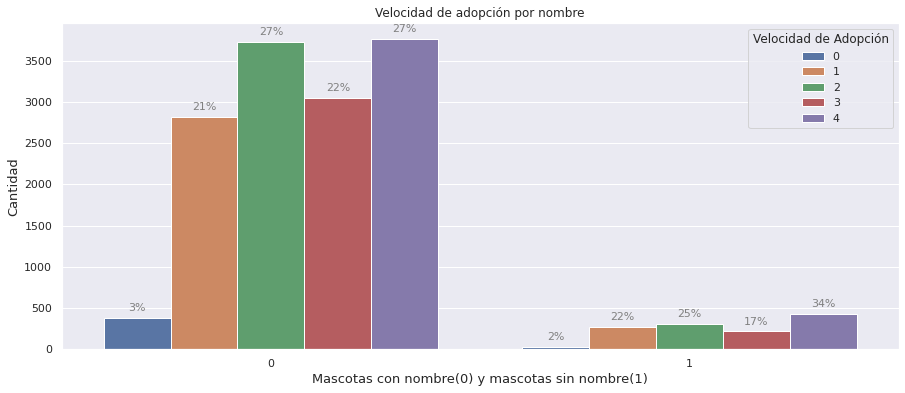

In [ ]:
#Gráfico de frecuencia de velocidad de adopción por nombre para los datos de entrenamiento
plt.figure(figsize = (15,6))
make_count_plot(df = train.loc[train['dataset_type']=='train'], x = 'No_name', title='por nombre')
plt.xlabel('Mascotas con nombre(0) y mascotas sin nombre(1)', fontsize=13)
plt.ylabel('Cantidad', fontsize=13)
plt.legend(title='Velocidad de Adopción');

El análisis asociado al nombre, indica que la proporción de mascotas con nombre con respecto a las que no tienen nombre es mayor y no se evidencia una tendencia clara asociada al nombre.

####**2.3** Razas de las mascotas

In [ ]:
#Lectura del archivo de etiqueta de las razas principales y secundarias de las mascotas (Breed Labels)
breed = pd.read_csv('/content/gdrive/My Drive/MONOGRAFIA/DATASET/BreedLabels.csv') 
breed

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita
...,...,...,...
302,302,2,Torbie
303,303,2,Tortoiseshell
304,304,2,Turkish Angora
305,305,2,Turkish Van


In [ ]:
#Conteo de los 5 razas principales más populares por clases de velocidad de adopción
print("Raza principal más popular de mascotas por velocidad de adopción")
for n in train['Breed1'].value_counts().index[:5]:
    print(n)
    print(train.loc[train['Breed1']==n,'AdoptionSpeed'].value_counts().sort_index())
    print("")

Raza principal más popular de mascotas por velocidad de adopción
307
0      81
1     859
2    1575
3    1381
4    2031
Name: AdoptionSpeed, dtype: int64

266
0      92
1     780
2    1033
3     753
4     976
Name: AdoptionSpeed, dtype: int64

265
0     45
1    334
2    340
3    227
4    312
Name: AdoptionSpeed, dtype: int64

299
0    10
1    82
2    95
3    64
4    91
Name: AdoptionSpeed, dtype: int64

264
0    17
1    99
2    73
3    55
4    52
Name: AdoptionSpeed, dtype: int64



In [ ]:
#Nombre del top 5 de las razas principales
print(breed.loc[(breed['BreedID'] == 307),'BreedName'])
print(breed.loc[(breed['BreedID'] == 266),'BreedName'])
print(breed.loc[(breed['BreedID'] == 265),'BreedName'])
print(breed.loc[(breed['BreedID'] == 299),'BreedName'])
print(breed.loc[(breed['BreedID'] == 264),'BreedName'])

240    Mixed Breed
Name: BreedName, dtype: object
266    Domestic Short Hair
Name: BreedName, dtype: object
265    Domestic Medium Hair
Name: BreedName, dtype: object
299    Tabby
Name: BreedName, dtype: object
264    Domestic Long Hair
Name: BreedName, dtype: object


In [ ]:
#Conteo de los 5 razas secundarias más populares por clases de velocidad de adopción
print("Raza secundaria más popular de mascotas por velocidad de adopción")
for n in train['Breed2'].value_counts().index[:5]:
    print(n)
    print(train.loc[train['Breed2']==n,'AdoptionSpeed'].value_counts().sort_index())
    print("")

Raza secundaria más popular de mascotas por velocidad de adopción
0
0     253
1    2214
2    2904
3    2267
4    3124
Name: AdoptionSpeed, dtype: int64

307
0     36
1    276
2    430
3    477
4    508
Name: AdoptionSpeed, dtype: int64

266
0     26
1    138
2    175
3    117
4    143
Name: AdoptionSpeed, dtype: int64

265
0    20
1    89
2    85
3    57
4    70
Name: AdoptionSpeed, dtype: int64

299
0     3
1    33
2    49
3    25
4    28
Name: AdoptionSpeed, dtype: int64



In [ ]:
#Nombre del top 5 de las razas secundarias
print(breed.loc[(breed['BreedID'] == 0),'BreedName'])
print(breed.loc[(breed['BreedID'] == 307),'BreedName'])
print(breed.loc[(breed['BreedID'] == 266),'BreedName'])
print(breed.loc[(breed['BreedID'] == 265),'BreedName'])
print(breed.loc[(breed['BreedID'] == 299),'BreedName'])

Series([], Name: BreedName, dtype: object)
240    Mixed Breed
Name: BreedName, dtype: object
266    Domestic Short Hair
Name: BreedName, dtype: object
265    Domestic Medium Hair
Name: BreedName, dtype: object
299    Tabby
Name: BreedName, dtype: object


Las 5 razas principales por velocidad de adopción son las razas mezcladas, mascotas domésticas con cabello corto, mascotas domésticas con cabello medio, gato atigrado y mascotas domésticas con cabello largo.

 Las 5 razas secundarias por velocidad de adopción son las mascotas que no tienen identificada una raza, las razas mezcladas, mascotas domésticas con cabello corto, mascotas domésticas con cabello medio y gato atigrado.

De acuerdo a la información encontrada se logra concluir que la mayoría de mascotas para adoptar tienen razas mezcladas y no tienen una raza identificada.

####**2.4** Edad de las mascotas

In [ ]:
#Conteo de edad para las mascotas
train['Age'].value_counts().head()

2     3503
1     2304
3     1966
4     1109
12     967
Name: Age, dtype: int64

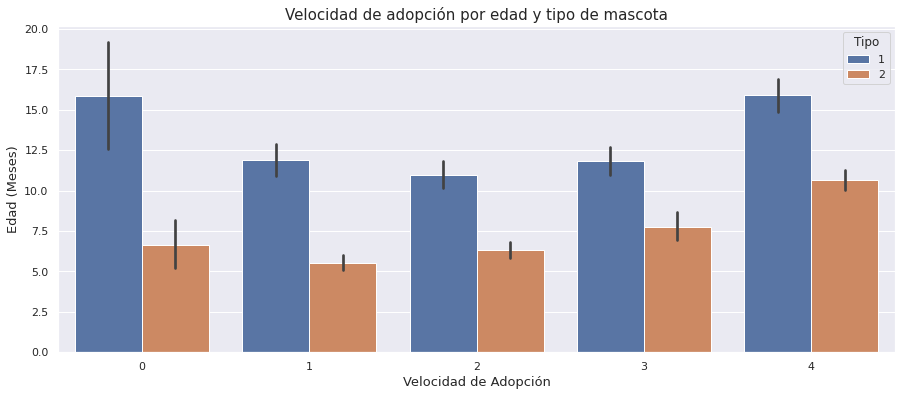

In [ ]:
#Gráfico de violín de velocidad de adopción por edad y tipo de mascota
plt.figure(figsize = (15,6))
sns.barplot(x="AdoptionSpeed", y="Age", hue="Type", data=train) 
plt.title('Velocidad de adopción por edad y tipo de mascota', fontsize=15)
plt.xlabel('Velocidad de Adopción', fontsize=13)
plt.ylabel('Edad (Meses)', fontsize=13)
plt.legend(title='Tipo');   

En el gráfico de violín se observa que en general la variabilidad de la edad es grande, esto debido a la extención de la línea a partir de la mediana.

Se puede observar que la edad de los perros tienen mayor viariabilidad con respecto a los gatos, entre menos edad tengan los animales del perfil se evidencia mayor velocidad de adopción.

####**2.5** Género de las mascotas

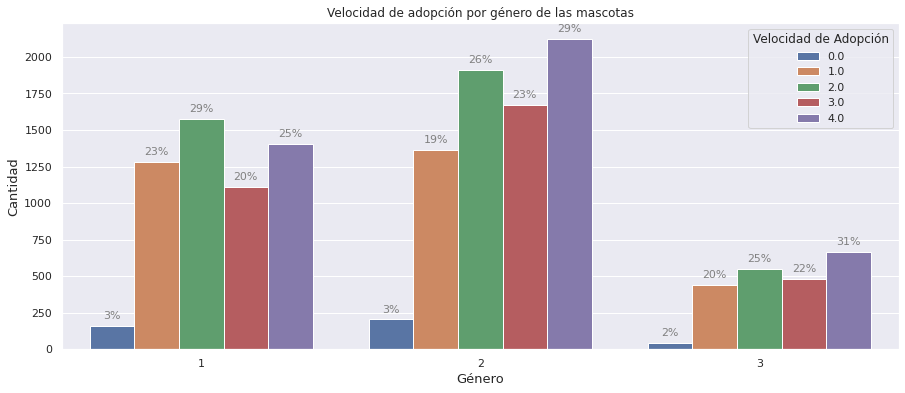

In [ ]:
#Gráfico de frecuencia de velocidad de adopción por género de las mascotas para los datos de entrenamiento
plt.figure(figsize =(15,6))
make_count_plot(df = all_data.loc[all_data['dataset_type']=='train'], x = 'Gender', title ='por género de las mascotas')
plt.xlabel('Género', fontsize=13)
plt.ylabel('Cantidad', fontsize=13)
plt.legend(title='Velocidad de Adopción');

En el gráfico se observa que el sexo femenino tiene mayor proporción. 

El sexo no tiene una incidencia clara en la velocidad de adopción esto dada la similitud del comportamiento por las categorías presentes.

####**2.6** Longitud del pelaje de las mascotas

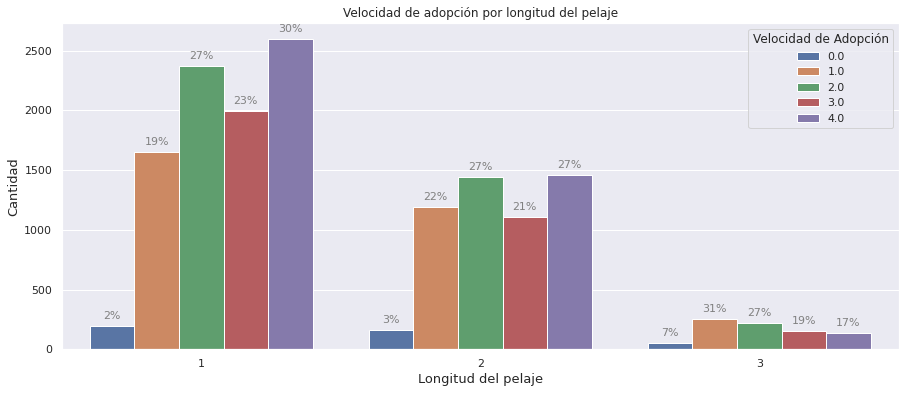

In [ ]:
#Gráfico de frecuencia de velocidad de adopción por longitud de pelaje de las mascotas
plt.figure(figsize =(15,6))
make_count_plot(df = all_data.loc[all_data['dataset_type']=='train'], x = 'FurLength', title ='por longitud del pelaje')
plt.xlabel('Longitud del pelaje', fontsize=13)
plt.ylabel('Cantidad', fontsize=13)
plt.legend(title='Velocidad de Adopción');

La proporción de mascotas de pelaje corto es mayor con respecto a las demas categorías. 

Se observa que para la categoría de pelaje largo los animales tienen mayor velocidad de adopción, sin embargo esto es evidente en una cantidad de datos pequeña.

####**2.7** Tamaño de las mascotas

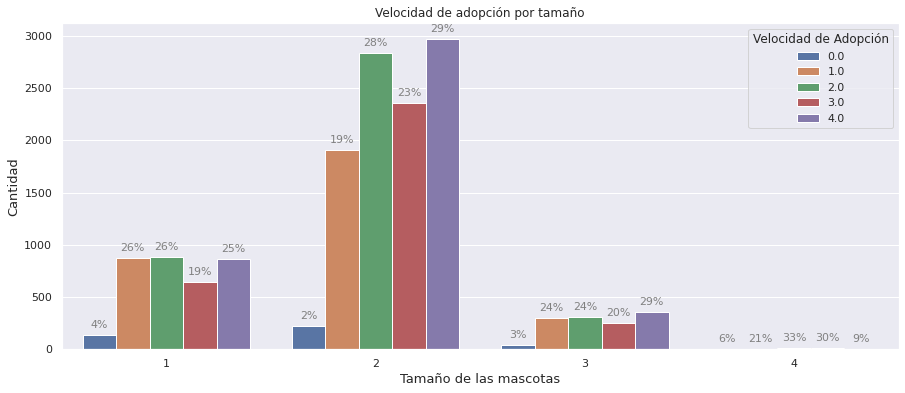

In [ ]:
#Gráfico de frecuencia de velocidad de adopción por tamaño de las mascotas
plt.figure(figsize =(15,6))
make_count_plot(df = all_data.loc[all_data['dataset_type']=='train'], x = 'MaturitySize', title ='por tamaño')
plt.xlabel('Tamaño de las mascotas', fontsize=13)
plt.ylabel('Cantidad', fontsize=13)
plt.legend(title='Velocidad de Adopción');

Se observa que el tipo de animal mediano tiene mayor participación en la base de datos, donde la mayor cantidad de estos son adoptados despues de los 100 días de ser incluidos en la lista.

El tipo de animales extragrande no tiene participación relevante en la base de datos.

####**2.8** Colores del pelaje de las mascotas

In [ ]:
#Lectura del archivo de etiqueta de los colores del pelaje de las mascotas (Color Labels)
colors = pd.read_csv('/content/gdrive/My Drive/MONOGRAFIA/DATASET/ColorLabels.csv') 

In [ ]:
#Diccionario para iteración del Id del color y del nombre para los datos de entrenamiento, test y la concatenación de ambos
colors_dict = {k: v for k, v in zip(colors['ColorID'], colors['ColorName'])}
train2['Color1_name'] = train2['Color1'].apply(lambda x: colors_dict[x] if x in colors_dict else '')
train2['Color2_name'] = train2['Color2'].apply(lambda x: colors_dict[x] if x in colors_dict else '')
train2['Color3_name'] = train2['Color3'].apply(lambda x: colors_dict[x] if x in colors_dict else '')

test2['Color1_name'] = test2['Color1'].apply(lambda x: colors_dict[x] if x in colors_dict else '')
test2['Color2_name'] = test2['Color2'].apply(lambda x: colors_dict[x] if x in colors_dict else '')
test2['Color3_name'] = test2['Color3'].apply(lambda x: colors_dict[x] if x in colors_dict else '')

all_data2['Nombre_Color'] = all_data2['Color1'].apply(lambda x: colors_dict[x] if x in colors_dict else '')
all_data2['Color2_name'] = all_data2['Color2'].apply(lambda x: colors_dict[x] if x in colors_dict else '')
all_data2['Color3_name'] = all_data2['Color3'].apply(lambda x: colors_dict[x] if x in colors_dict else '')

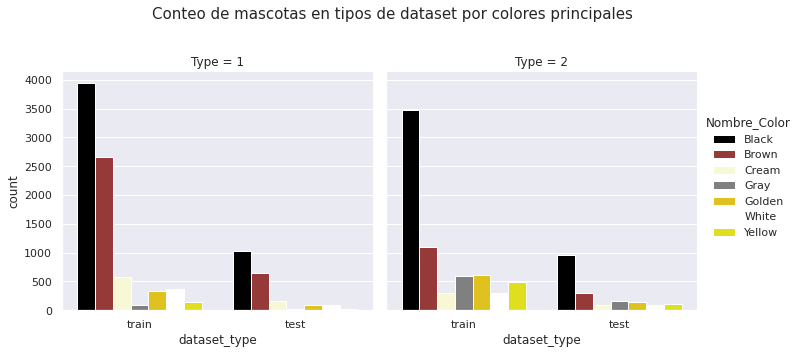

In [ ]:
#Gráfico de conteo del color principal por tipo de mascota para todo el conjunto de datos
sns.factorplot('dataset_type', col='Type', data=all_data2, kind='count', hue='Nombre_Color', palette=['Black', 'Brown', '#FFFDD0', 'Gray', 'Gold', 'White', 'Yellow']);
plt.subplots_adjust(top=0.8)
plt.suptitle('Conteo de mascotas en tipos de dataset por colores principales', fontsize=15);

El color negro tiene mayor participación en los dos tipos de animales tanto para los conjuntos de datos de entrenamiento como para los conjuntos de test.

In [ ]:
#Función para realizar diferentes gráficos por categoría de velocidad de adopción y diferentes variables
def make_factor_plot_individual(df, x, col, title, main_count=main_count, hue=None, ann=True, col_wrap=4):
    if hue:
        g = sns.factorplot(col, col=x, data=df, kind='count', col_wrap=col_wrap, hue=hue);
    else:
        g = sns.factorplot(col, col=x, data=df, kind='count', col_wrap=col_wrap);
    plt.subplots_adjust(top=0.9);
    plt.suptitle(title);
    ax = g.axes
    plot_dict = prepare_plot_dict(df, x, main_count)
    if ann:
        for a in ax:
            for p in a.patches:
                text = f"{plot_dict[p.get_height()]:.0f}%" if plot_dict[p.get_height()] < 0 else f"{plot_dict[p.get_height()]:.0f}%"
                a.annotate(text, (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=11, color='gray' if plot_dict[p.get_height()] > 0 else 'red', rotation=0, xytext=(0, 10),
                     textcoords='offset points')  

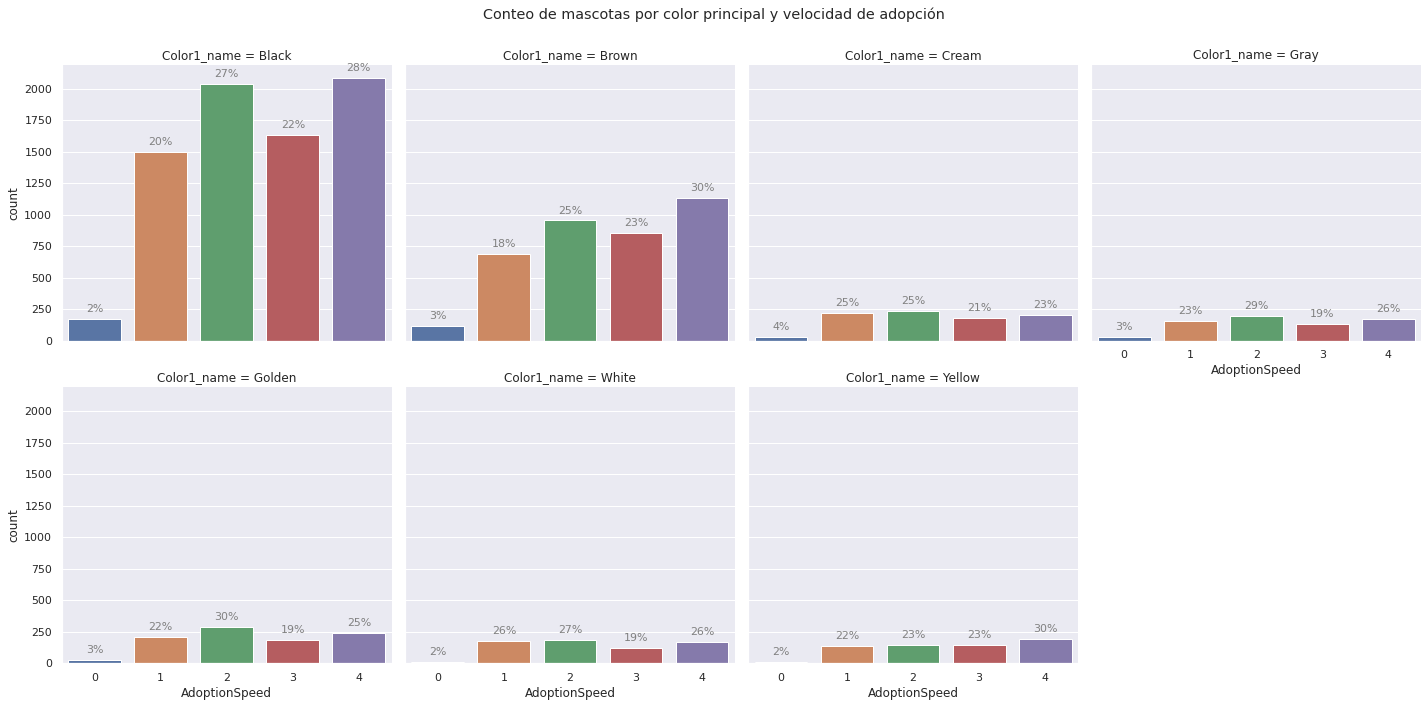

In [ ]:
#Gráfico de frecuencia por color principal de las mascotas y velocidad de adopción
make_factor_plot_individual(df=train2, x='Color1_name', col='AdoptionSpeed', title='Conteo de mascotas por color principal y velocidad de adopción')

Cuando se observa el color con respecto a la velocidad de adopción, se observa que para el color negro, la participación por velocidad de adopción es con respecto a la categoría 4 y 2, es decir, mayor a 100 días y entre 8 y 30 días.

####**2.9** Salud de las Mascotas

##### **2.9.1** Mascotas Esterilizadas y Desparasitadas

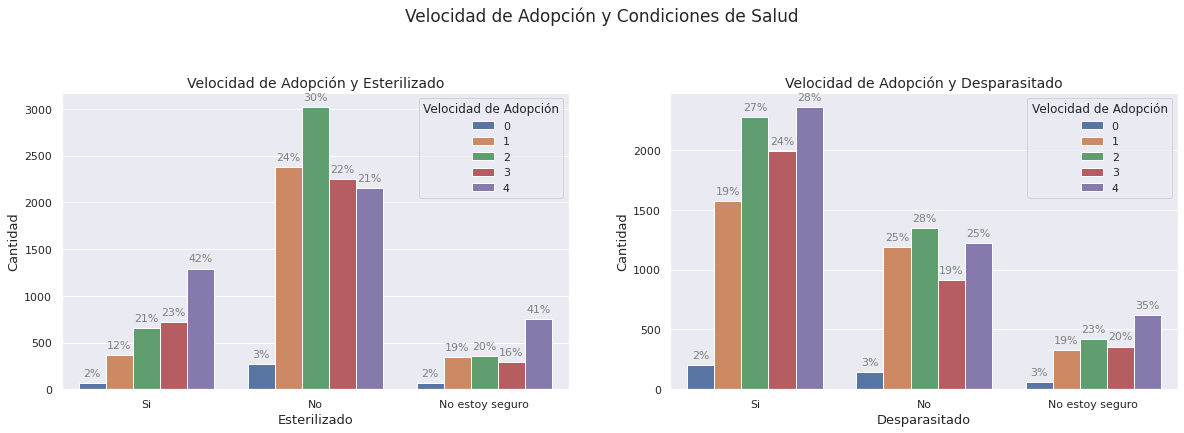

In [ ]:
#Gráfico de la velocidad de adopción con la esterilización, y la velocidad de adopción con la desparasitación
plt.figure(figsize=(20, 12));
plt.subplot(2, 2, 1)
make_count_plot(df=train, x='Sterilized')
plt.xticks([0, 1, 2], ['Si', 'No', 'No estoy seguro']);
plt.title('Velocidad de Adopción y Esterilizado', fontsize=14)
plt.xlabel('Esterilizado', fontsize=13)
plt.ylabel('Cantidad', fontsize=13)
plt.legend(title='Velocidad de Adopción');   

plt.subplot(2, 2, 2)
make_count_plot(df=train, x='Dewormed')
plt.xticks([0, 1, 2], ['Si', 'No', 'No estoy seguro']);
plt.title('Velocidad de Adopción y Desparasitado', fontsize=14)
plt.xlabel('Desparasitado', fontsize=13)
plt.ylabel('Cantidad', fontsize=13)
plt.legend(title='Velocidad de Adopción');   

plt.suptitle('Velocidad de Adopción y Condiciones de Salud',fontsize=17, fontweight=50);

##### **2.9.2** Vacunación y Salud de las Mascotas

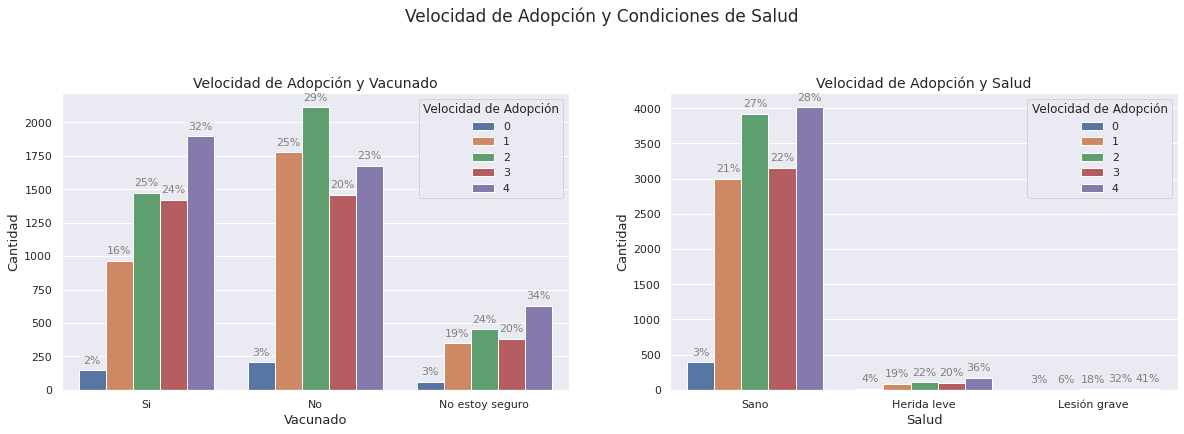

In [ ]:
#Gráfico de la velocidad de adopción con la vacunación, y la velocidad de adopción con la salud
plt.figure(figsize=(20, 12));
plt.subplot(2, 2, 1)
make_count_plot(df=train, x='Vaccinated', title='Vacunado')
plt.xticks([0, 1, 2], ['Si', 'No', 'No estoy seguro']);
plt.title('Velocidad de Adopción y Vacunado', fontsize=14)
plt.xlabel('Vacunado', fontsize=13)
plt.ylabel('Cantidad', fontsize=13)
plt.legend(title='Velocidad de Adopción');   

plt.subplot(2, 2, 2)
make_count_plot(df=train, x='Health', title='Salud')
plt.xticks([0, 1, 2], ['Sano', 'Herida leve', 'Lesión grave']);
plt.title('Velocidad de Adopción y Salud', fontsize=14)
plt.xlabel('Salud', fontsize=13)
plt.ylabel('Cantidad', fontsize=13)
plt.legend(title='Velocidad de Adopción');   

plt.suptitle('Velocidad de Adopción y Condiciones de Salud',fontsize=17, fontweight=50);

De acuerdo a los gráficos anteriores se puede observar que las personas prefieren mascotas sin esterilizar, quizás porque desean tener cachorros o gatos pequeños; la mayoría de estas mascotas se adoptan en el primer mes de incluirlos en la lista de adopción. También es importante mencionar que se adoptan fácilmente las mascotas desparasitadas que llevan en lista de adopción un mes y menos de 90 días.

Además, las personas prefieren adoptar mascotas no vacunadas, tal vez porque desean llevarlos al veterinario. Estas mascotas se adoptan después de estar un mes en la lista de adopción. Igualmente, se dan en adopción fácilmente las mascotas que estén sanas y que llevan un mes y menos de 90 días en la lista de adopción. Aunque la mayoría de las mascotas estén sanas, las que tienen heridas leves son pocas, pero no se adoptan tan fácil y las que tienen lesiones graves es insignificante el número.

Finalmente, es importante mencionar que cuando no se tiene información sobre el estado de salud de la mascota, la probabilidad de no ser adoptado es mucho más alta.

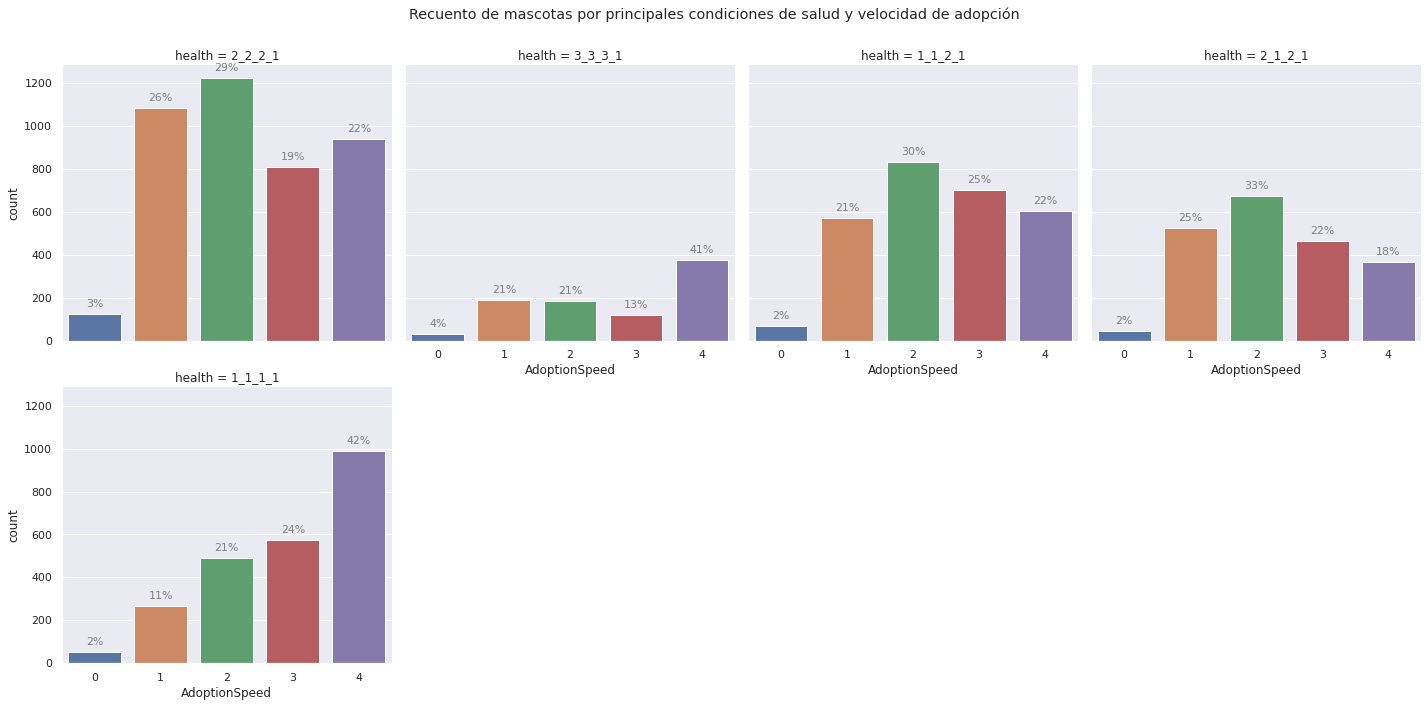

In [ ]:
#Gráficos por tipo de salud para las mascotas
train2['health'] = train2['Vaccinated'].astype(str) + '_' + train2['Dewormed'].astype(str) + '_' + train2['Sterilized'].astype(str) + '_' + train2['Health'].astype(str)
test2['health'] = test2['Vaccinated'].astype(str) + '_' + test2['Dewormed'].astype(str) + '_' + test2['Sterilized'].astype(str) + '_' + test2['Health'].astype(str)

make_factor_plot_individual(df=train2.loc[train2['health'].isin(list(train2.health.value_counts().index[:5]))], x='health', col='AdoptionSpeed', title='Recuento de mascotas por principales condiciones de salud y velocidad de adopción');

- Las mascotas sanas, desparasitadas y no esterilizadas tienden a ser adoptadas más rápido.

- Las mascotas completamente sanas son más propensas a no ser adoptadas; se deduce que eso significa que mucha gente presta atención a otras características.

- Las mascotas sanas sin información (valor incierto) también tienden a ser adoptadas con menos frecuencia. Quizás la gente prefiera tener información, aunque sea negativa.

####**2.10** Cantidad de las Mascotas

In [ ]:
#Sacando los grupos de mascotas mayores a 11
train.loc[train['Quantity']>11][['Name','Description','Quantity','AdoptionSpeed']].head(10)

,Name,Description,Quantity,AdoptionSpeed
263,20 Little Puppies,"These are 20 puppies, from 2 stray mums need g...",20,4
320,18 Cats For NEED HOMES!!,YOU can CONTACT the couple at if you are inter...,18,4
396,"Giant, Cookie & Snoopy. ! Thanks!",puppies for adoption. Rescued by some good sam...,12,2
427,OMIEY'S HOME,"Hi, kepada sesiapa yang berminat untuk adopt k...",20,4
823,Pancho & Tita,"Pancho and Tita are 2 adorable, playful kitten...",12,2
1302,unnamed,Sebare Bengal is a specialist catery breeding ...,14,4
1305,Bailey,Bailey is an obedient and loyal dog Her owner ...,20,4
1404,unnamed,I had uploaded the pups' group photos earlier....,17,2
1659,Cats From TTDI Now In Omiey's Home,"Hi feline lovers, There are 40 cats desperatel...",20,2
2558,( 0 Puppies Left )14+2 Puppies,They are 2 stray mother dogs gave birth 14 pup...,16,2


In [ ]:
#Cantidad de mascotas
train['Quantity'].value_counts()

1     11565
2      1422
3       726
4       531
5       333
6       185
7        84
8        52
9        33
10       19
20       12
11       10
12        6
15        4
17        3
16        3
13        2
14        2
18        1
Name: Quantity, dtype: int64

A veces hay una gran cantidad de mascotas en algunos anuncios, pero al mismo tiempo, en ocasiones el texto y la cantidad no coinciden; un ejemplo de ello es el siguiente anuncio: 

"Pancho y Tita son 2 adorables y juguetones gatitos. Pueden ser tímidos al principio, pero una vez que te conocen, son las mascotas más dulces que cualquiera podría pedir. Disponible para adopción ahora. Están muy, muy cerca, así que buscamos a alguien que pueda llevarlos a ambos".

En la descripción dice que son dos gatitos, pero en la cantidad hay 12 gatos por alguna razón.

Una cosa que vale la pena notar es que a veces todas estas mascotas son adoptadas, lo cual es algo muy positivo.

####**2.11** Tarifa de Adopción de las mascotas

Algunas mascotas se pueden conseguir de forma gratuita, aunque para la adopción de otras mascotas es necesario pagar una cierta cantidad de dinero.

In [ ]:
#Definiendo una función para 4 gráficos del tipo de tarifa de las mascotas
def plot_four_graphs_(col='', main_title='', dataset_title=''):
    plt.figure(figsize=(20, 12));
    plt.subplot(2, 2, 1)
    make_count_plot(df=train2, x=col)
    plt.title('Velocidad de Adopción y Tarifa', fontsize=15)
    plt.ylabel('Cantidad', fontsize=13)
    plt.xlabel('Tarifa', fontsize=13)
    plt.legend(title='Velocidad de adopción')

    plt.subplot(2, 2, 2)
    sns.countplot(x='dataset_type', data=all_data2, hue=col);
    plt.title('Número de mascotas por tarifa en los datos', fontsize=15)
    plt.ylabel('Cantidad', fontsize=13)
    plt.xlabel('Tipo de conjunto de datos', fontsize=13)
    plt.legend(title='Velocidad de adopción');

    plt.subplot(2, 2, 3)
    make_count_plot(df=train2.loc[train2['Type'] == 1], x=col)
    plt.title('Velocidad de Adopción y Tarifa para perros', fontsize=15)
    plt.ylabel('Cantidad', fontsize=13)
    plt.xlabel('Tarifa', fontsize=13)
    plt.legend(title='Tarifa')

    plt.subplot(2, 2, 4)
    make_count_plot(df=train2.loc[train2['Type'] == 2], x=col)
    plt.title('Velocidad de Adopción y Tarifa para gatos', fontsize=15)
    plt.ylabel('Cantidad', fontsize=13)
    plt.xlabel('Tarifa', fontsize=13)
    plt.legend(title='Velocidad de adopción')

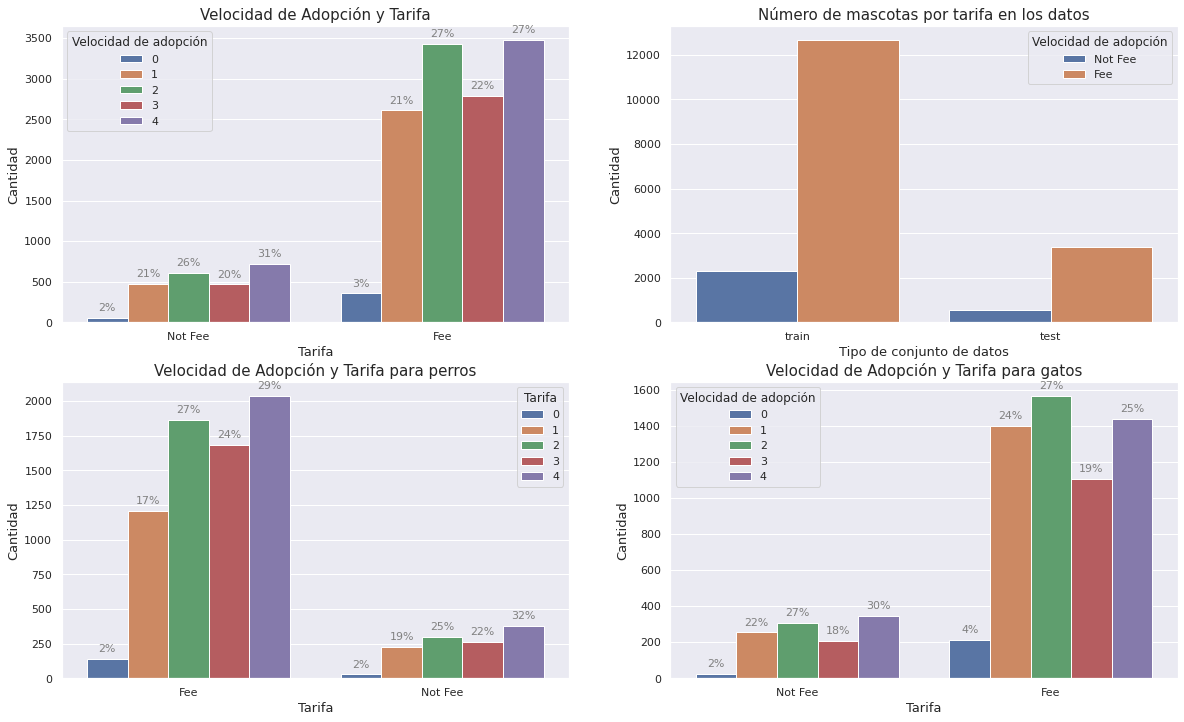

In [ ]:
#Creación de variable para el gráfico del tipo de tarifas para las mascotas
train2['Fee'] = train2['Fee'].apply(lambda x: 'Fee' if x == 0 else 'Not Fee')
test2['Fee'] = test2['Fee'].apply(lambda x: 'Fee' if x == 0 else 'Not Fee')
all_data2['Fee'] = all_data2['Fee'].apply(lambda x: 'Fee' if x == 0 else 'Not Fee')
plot_four_graphs_(col='Fee', main_title='Fee')

La mayoría de las mascotas son gratuitas y parece que pedir una tarifa redujo ligeramente las posibilidades de adopción. Además, los gatos sin crías se adoptan más rápido que los perros sin crías.

In [ ]:
#Tabla de visualización de las Tarifas de las mascotas
all_data.sort_values('Fee', ascending=False)[['Name', 'Description', 'Fee', 'AdoptionSpeed', 'dataset_type']]

,Name,Description,Fee,AdoptionSpeed,dataset_type
8722,Khaleesi And Drogo,Both pups are family home trained. They love t...,3000,3.00,train
10477,Bull Dog,Found this bull dog near my neighbourhood for ...,2000,1.00,train
207,unnamed,These two german shepherds are looking for a h...,1500,nan,test
2078,Rottweiler - Adoption,Open for Adoption with Fees Looking for new lo...,1000,2.00,train
3469,Cheras,We have just rescued a dog at 18.5km grand sag...,1000,nan,test
...,...,...,...,...,...
7972,Alley Kitty,Another kitten I found alone behind my office....,0,2.00,train
1485,Offwhite,white brownish (very dull brown looks like it ...,0,3.00,train
7974,Cheepee & Munchee,I rescued Cheepee & Munchee back in when they ...,0,2.00,train
7975,Tiger Ninja,"I is Ninja! I likez peoplez, carz, and wiggliz...",0,2.00,train


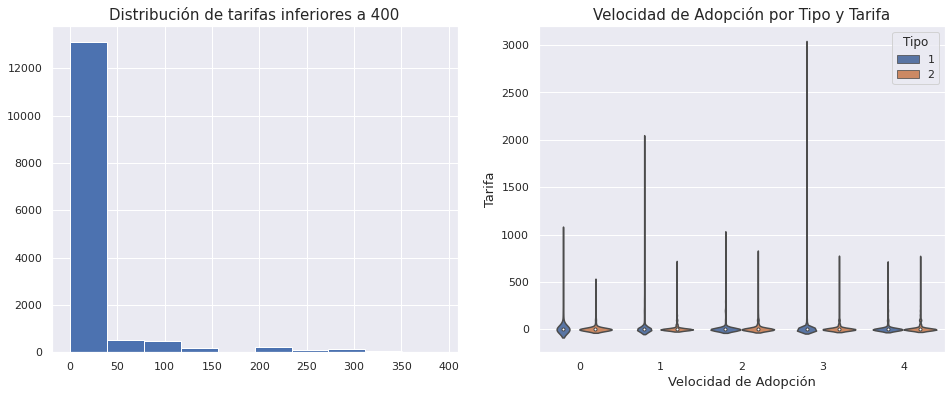

In [ ]:
#Gráfico de las tarifas de adopción de las mascotas con la velocidad de adopción por tipo de mascota
plt.figure(figsize=(16, 6));
plt.subplot(1, 2, 1)
plt.hist(train.loc[train['Fee'] < 400, 'Fee']);
plt.title('Distribución de tarifas inferiores a 400', fontsize=15);

plt.subplot(1, 2, 2)
sns.violinplot(x="AdoptionSpeed", y="Fee", hue="Type", data=train);
plt.title('Velocidad de Adopción por Tipo y Tarifa', fontsize=15)
plt.ylabel('Tarifa', fontsize=13)
plt.xlabel('Velocidad de Adopción', fontsize=13)
plt.legend(title='Tipo')
plt.show()

Las mascotas con tarifas altas tienden a ser adoptadas bastante rápido, tal vez la gente prefiera pagar por mascotas "mejores": sanas, entrenadas, entre otros aspectos.

La mayoría de las mascotas se entregan gratis y las tarifas suelen ser inferiores a $100.

Las tarifas para los perros tienden a ser más altas, aunque estos son casos raros.

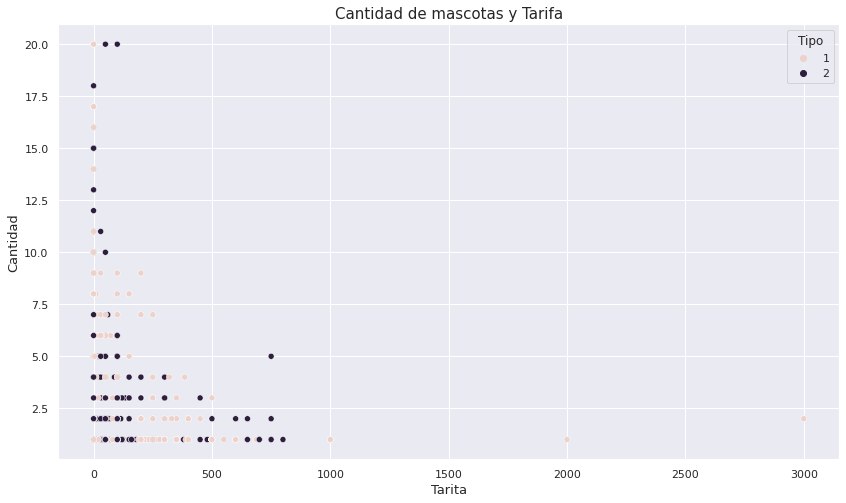

In [ ]:
#Gráfico de la cantidad de mascotas con las tarifas de adopción
plt.figure(figsize=(14, 8));
sns.scatterplot(x="Fee", y="Quantity", hue="Type",data=train);
plt.title('Cantidad de mascotas y Tarifa', fontsize=15)
plt.ylabel('Cantidad', fontsize=13)
plt.xlabel('Tarita', fontsize=13)
plt.legend(title='Tipo')
plt.show()

Según el gráfico anterior las tarifas y la cantidad de mascotas tienen una relación inversamente proporcional, ya que entre menos mascotas haya, mayor es la tarifa; quizá porque estas mascotas solas están mejor entrenadas y preparadas que las demás. Cabe resaltar que las mascotas que se venden a un precio más alto son los perros y hay menor cantidad de estos casos.

####**2.12** Estados de Malasia

In [ ]:
#Leyendo el archivo etiquetas de Estado de Malasia
state_labels = pd.read_csv('/content/gdrive/My Drive/MONOGRAFIA/DATASET/state_labels.csv')
state_labels

,StateID,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan
5,41324,Melaka
6,41332,Negeri Sembilan
7,41335,Pahang
8,41330,Perak
9,41380,Perlis


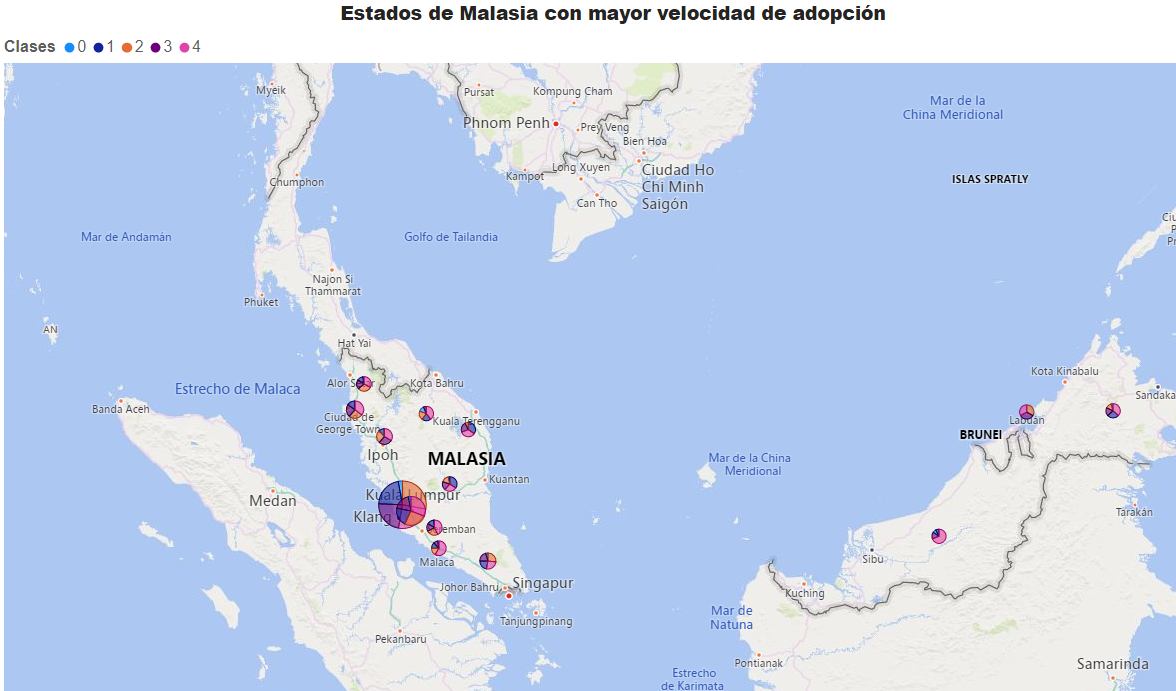

In [ ]:
#Lectura de la imagen de Velocidad de adopción por Estados de Malasia
# Link_grafica = https://app.powerbi.com/view?r=eyJrIjoiYWU0YWQ2NmUtMjkxYS00MmIwLWI4MWItOTM2MjU0MWEzNTdlIiwidCI6Ijk5ZTFlNzIxLTcxODQtNDk4ZS04YWZmLWIyYWQ0ZTUzYzFjMiIsImMiOjR9&pageName=ReportSection8e07a56870b09c0b66cb
path="/content/gdrive/My Drive/MONOGRAFIA/ANEXOS/Velocidad de adopción por Estados.png"
display(Image.open(path))

In [ ]:
#Creando un diccionario para los datos de entrenamiento, testeo y toda la data mezclada
states_dict = {k: v for k, v in zip(state_labels['StateID'], state_labels['StateName'])}
train2['State_name'] = train2['State'].apply(lambda x: '_'.join(states_dict[x].split()) if x in states_dict else 'Unknown')
test2['State_name'] = test2['State'].apply(lambda x: '_'.join(states_dict[x].split()) if x in states_dict else 'Unknown')
all_data2['State_name'] = all_data2['State'].apply(lambda x: '_'.join(states_dict[x].split()) if x in states_dict else 'Unknown')

In [ ]:
#Visualizando los estados que representan mayormente los anuncios de la adopción de mascotas
all_data2['State_name'].value_counts(normalize=True).head()

Selangor       0.56
Kuala_Lumpur   0.26
Pulau_Pinang   0.07
Johor          0.03
Perak          0.03
Name: State_name, dtype: float64

Los tres primeros estados representan aproximadamente el 90% de los anuncios de la adopción de las mascotas son Selangor, Kuala_Lumpur y Pulau_Pinang.

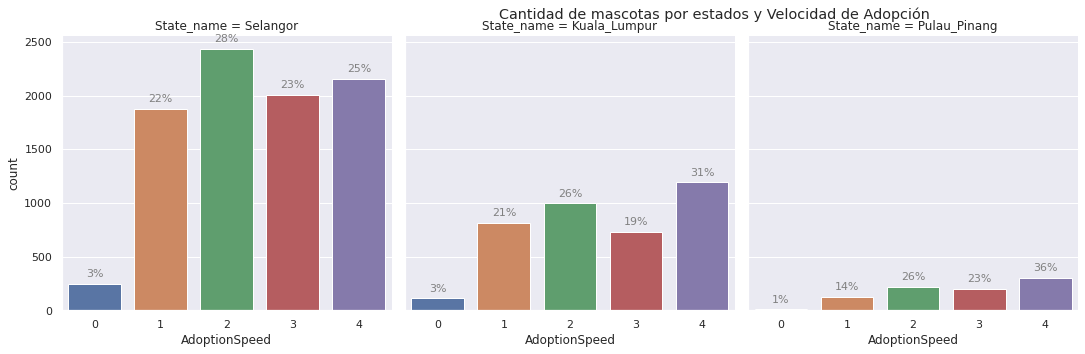

In [ ]:
#Gráfico del top 3 de anuncios de las mascotas por Estados en Malasia
make_factor_plot_individual(df=train2.loc[train2['State_name'].isin(list(train2.State_name.value_counts().index[:3]))], x='State_name', col='AdoptionSpeed', title='Cantidad de mascotas por estados y Velocidad de Adopción')

Como se corrobora en las gráficas el estado de Selangor de Malasia es donde hay mayor velocidad de adopción, esto debido a sus anuncios

####**2.13** Exploración de datos consolidado

In [ ]:
#Generando el reporte de análisis del dataset
report = sv.analyze(all_data)

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
#Generando el reporte consolidado de la exploración de los datos
report.show_html('exploración_datos.html', open_browser=False)

Report exploración_datos.html was generated.



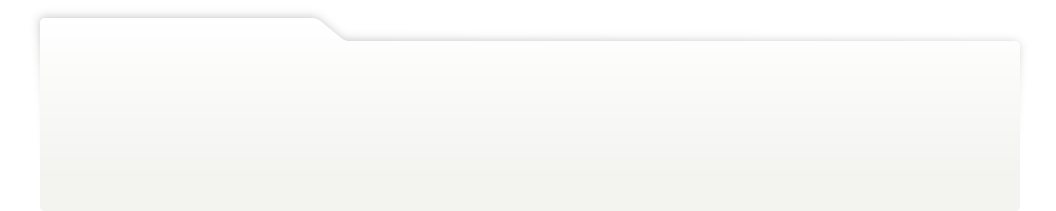
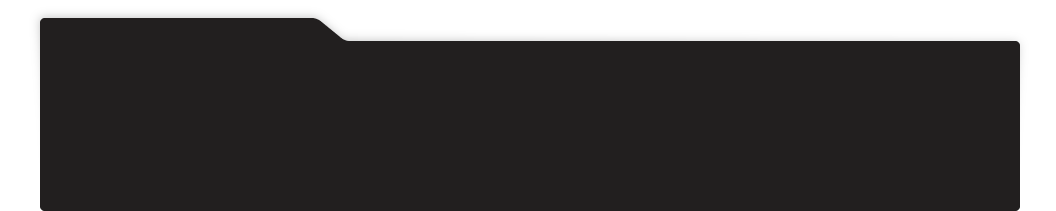
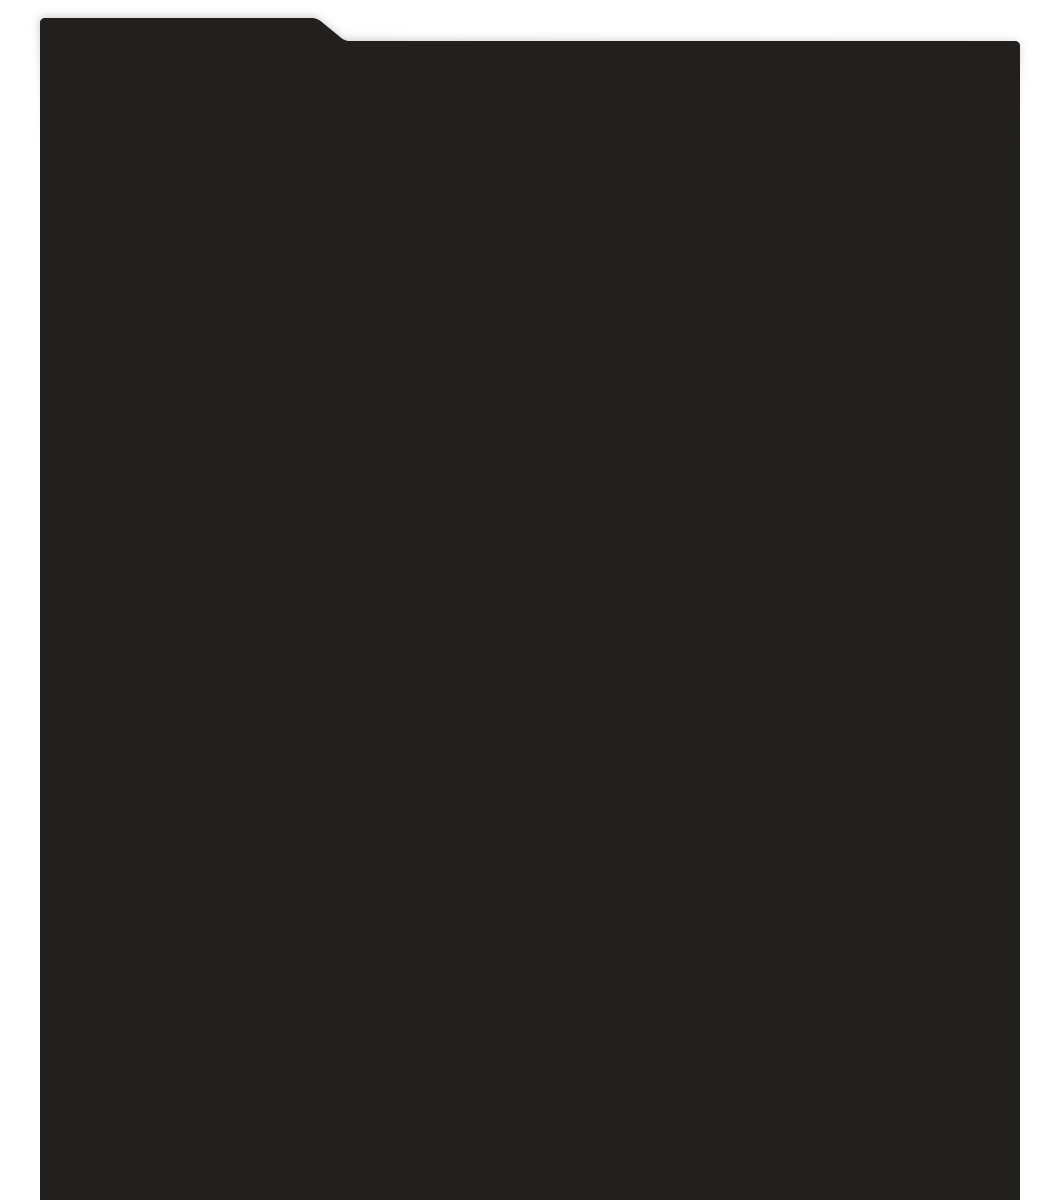
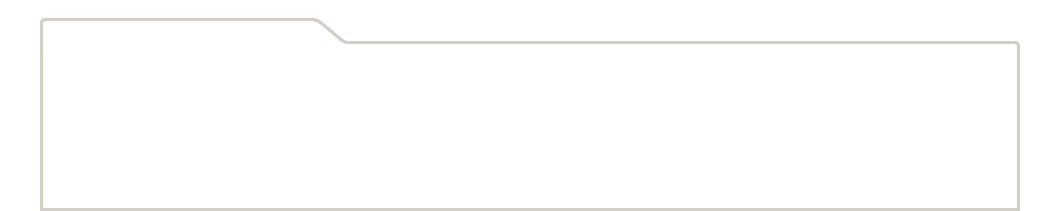
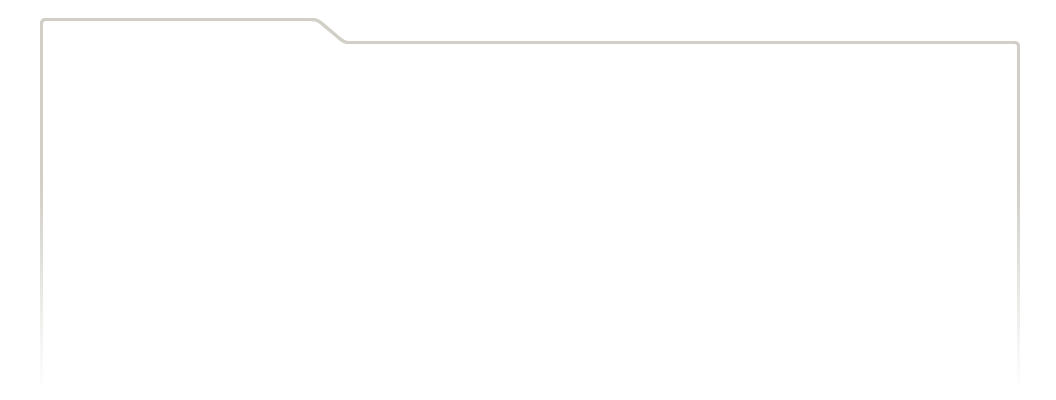
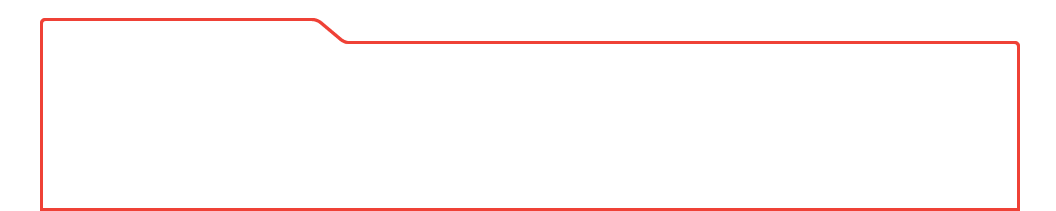
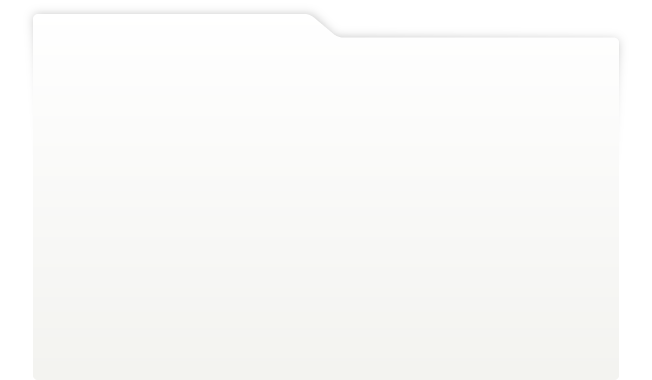
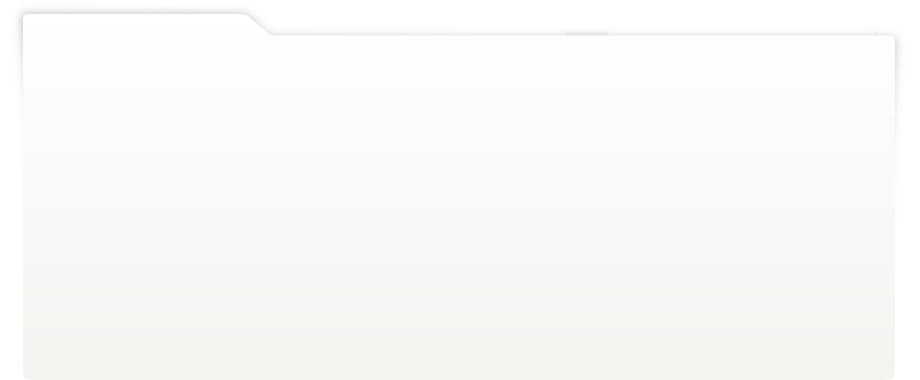
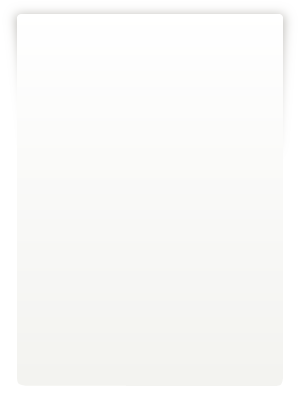
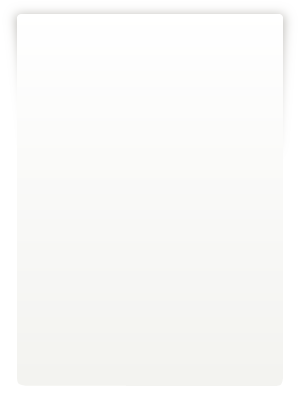
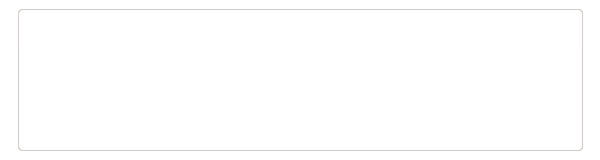
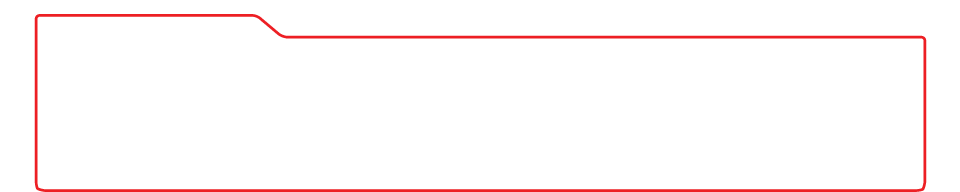
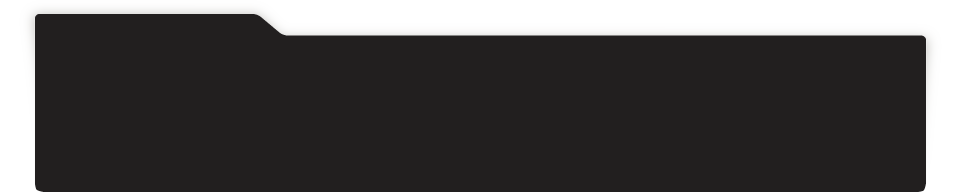
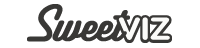
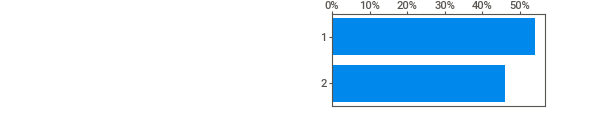
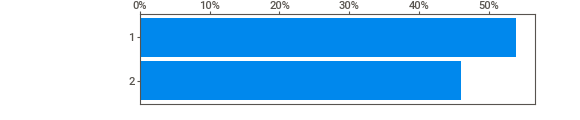
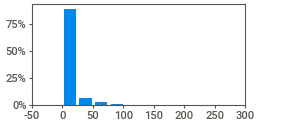
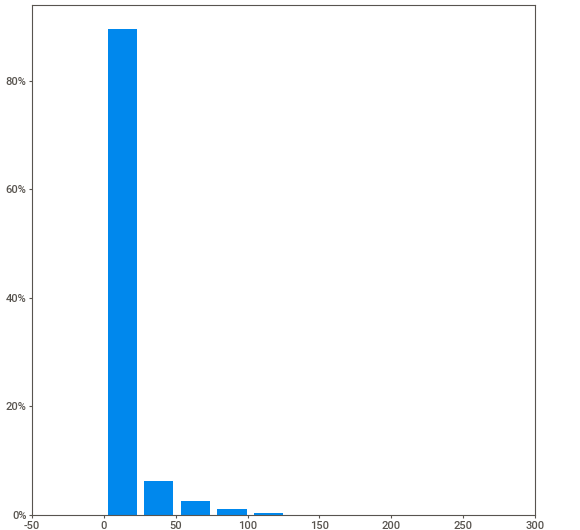
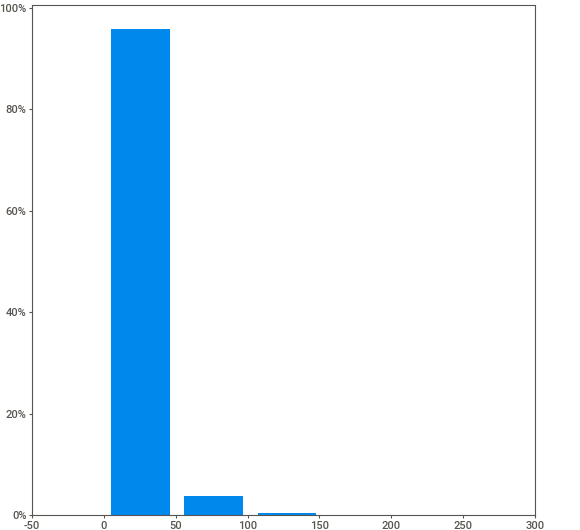
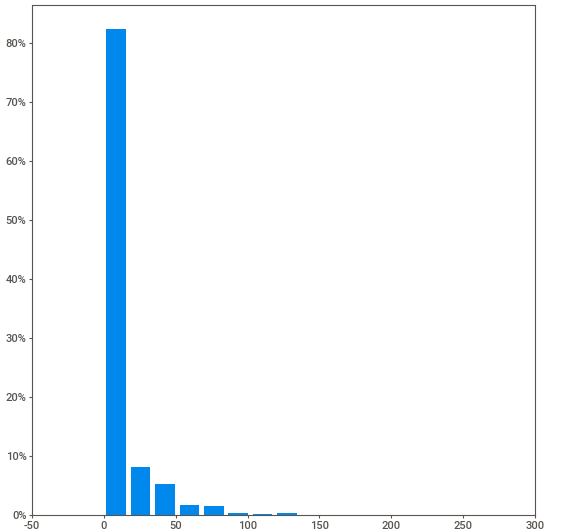
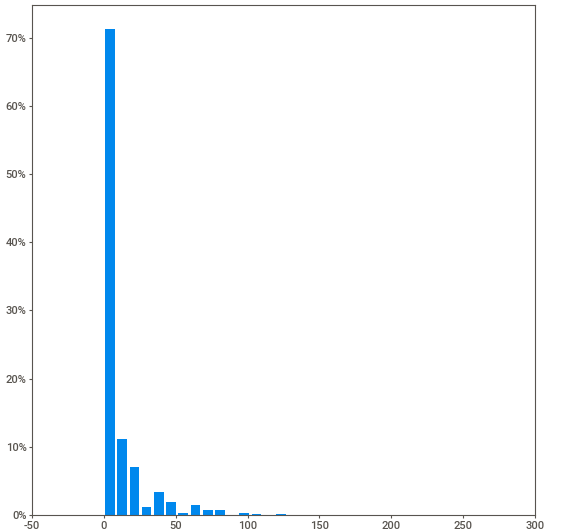
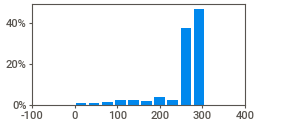
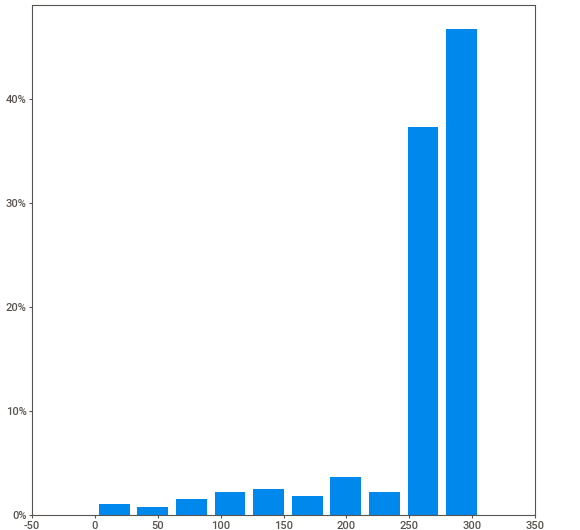
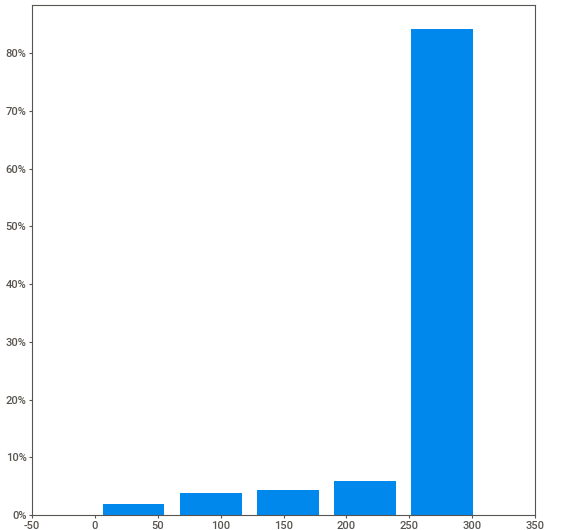
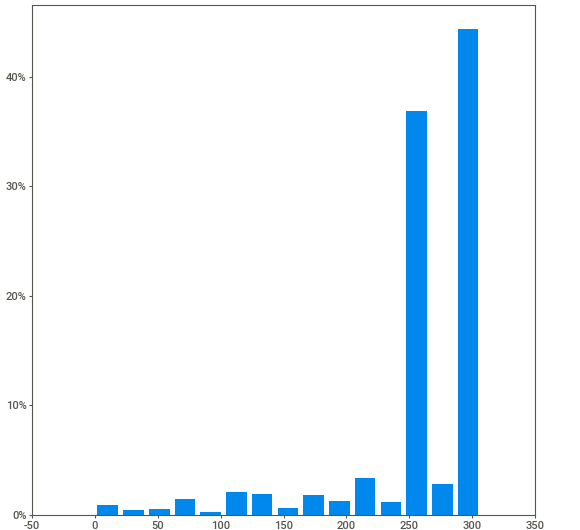
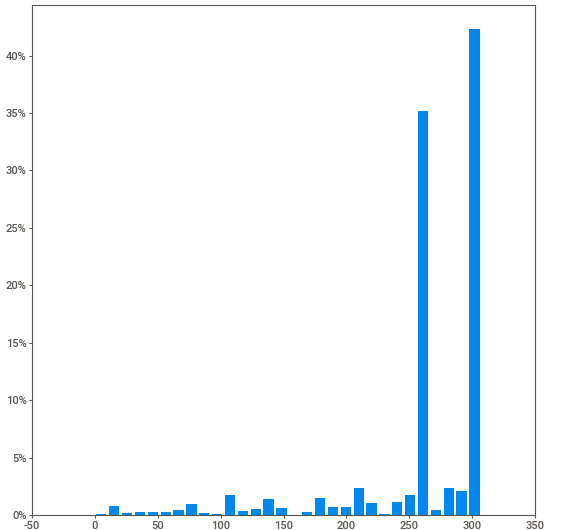
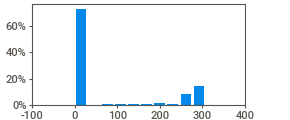
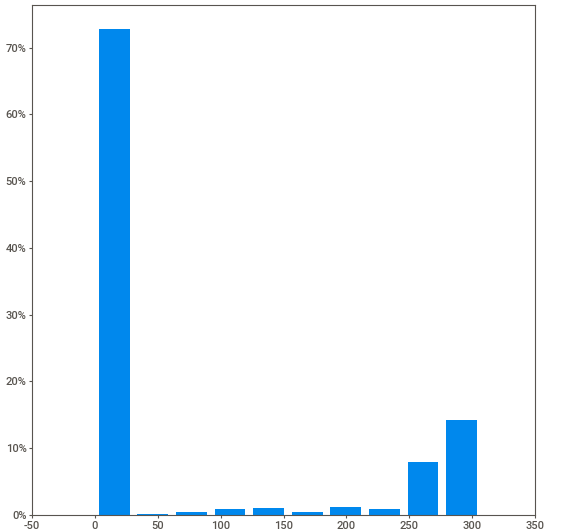
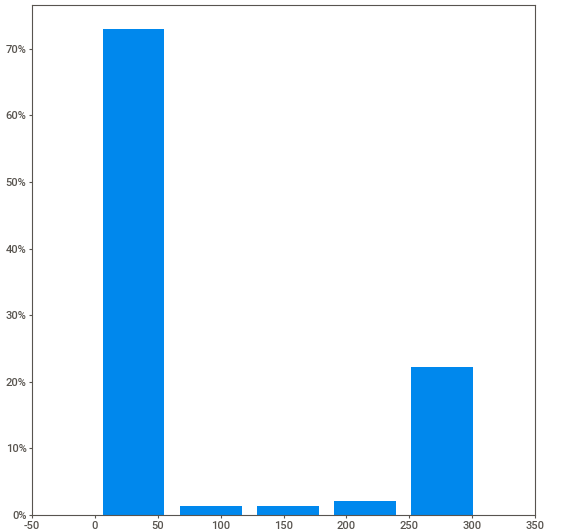
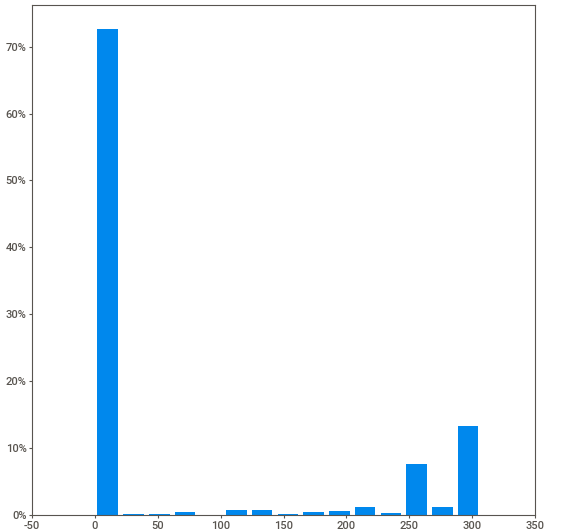
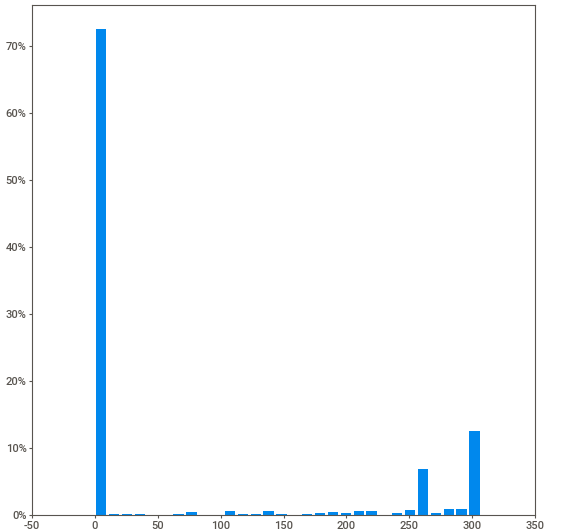
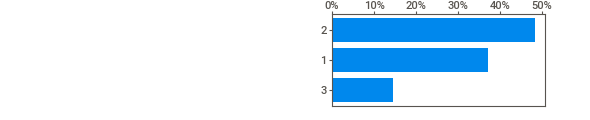
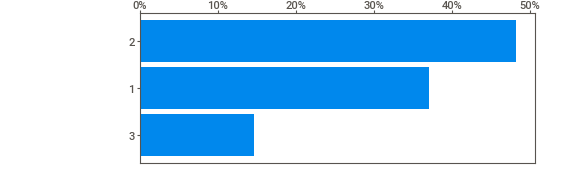
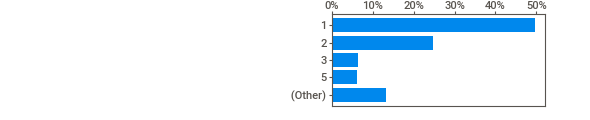
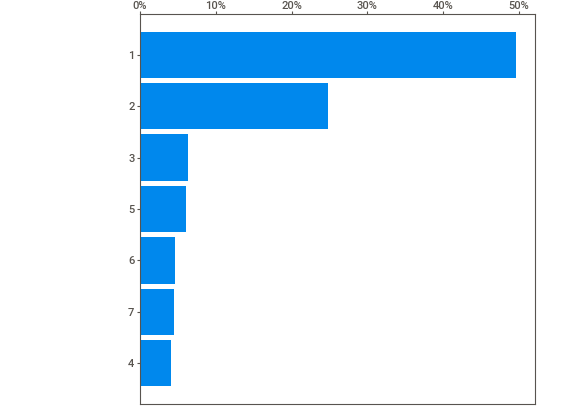
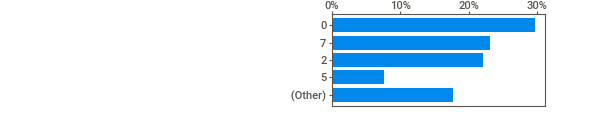
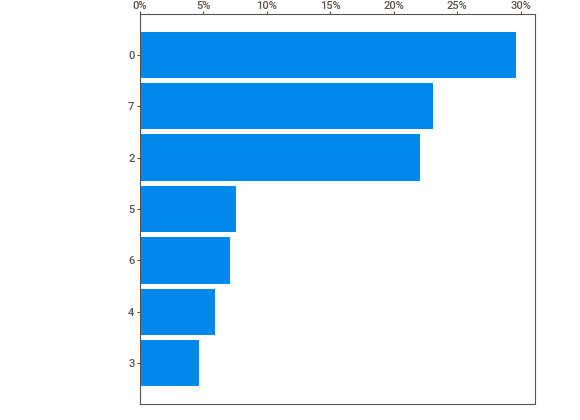
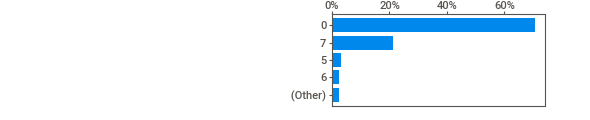
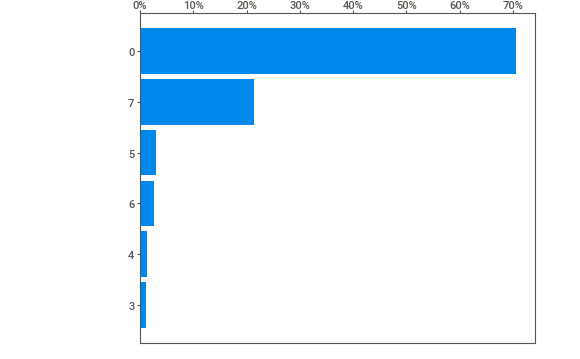
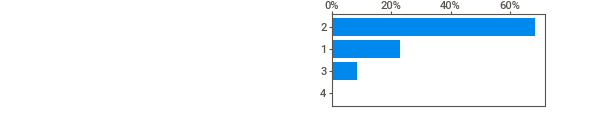
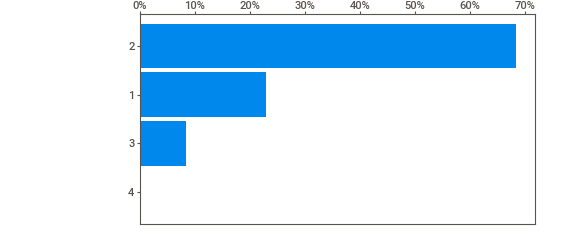
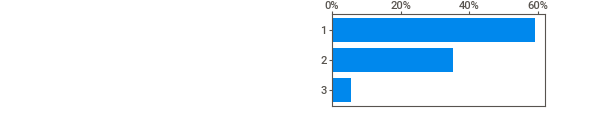
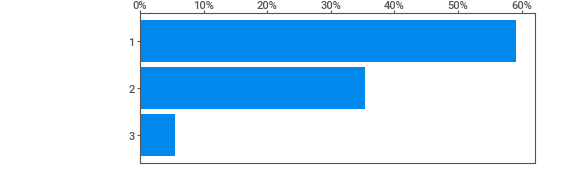
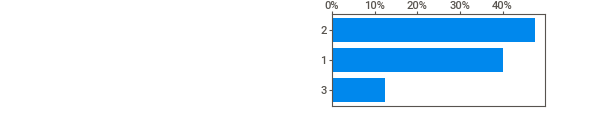
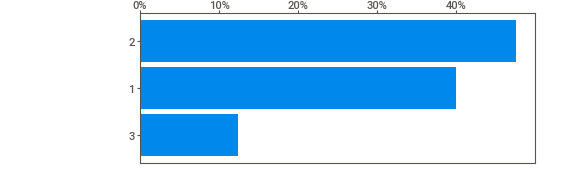
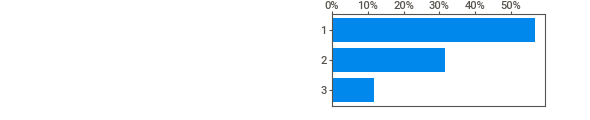
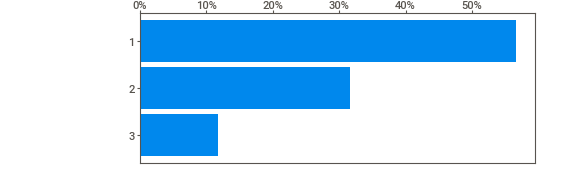
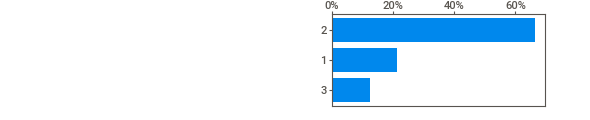
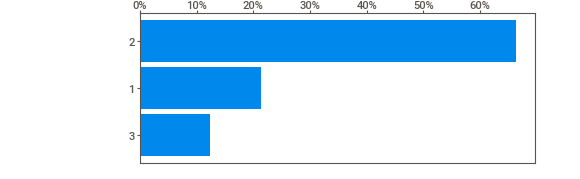
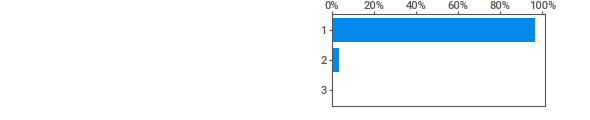
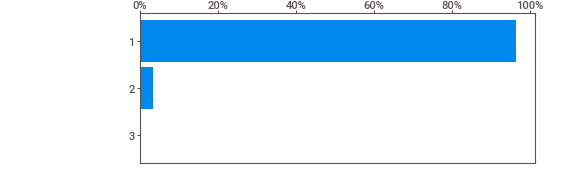
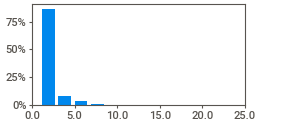
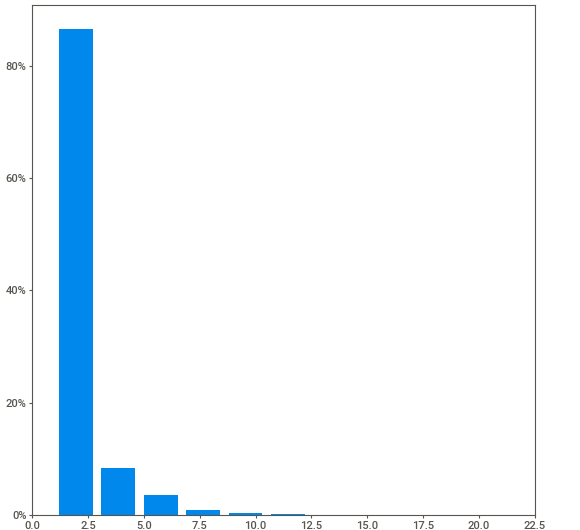
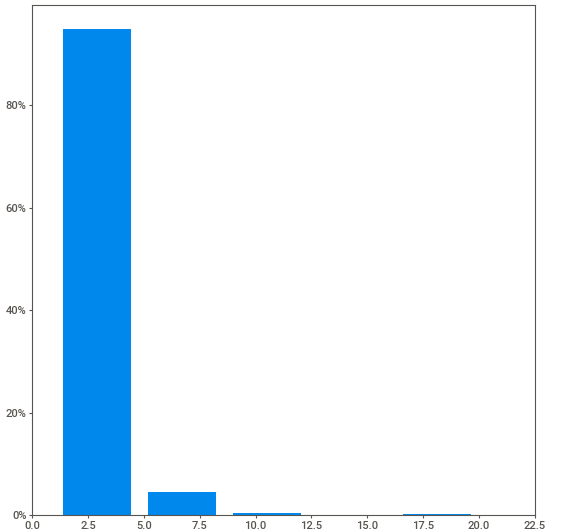
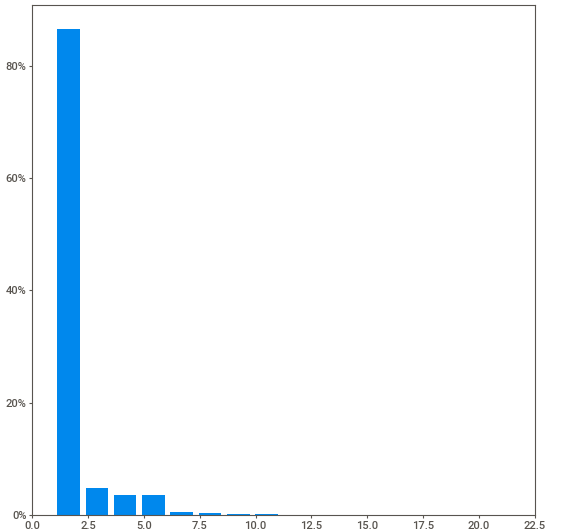
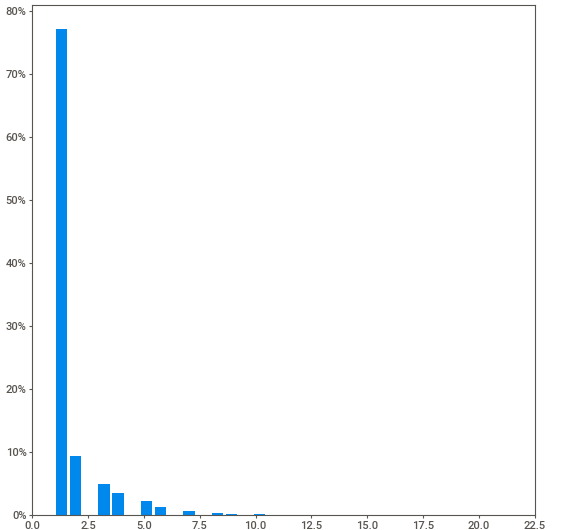
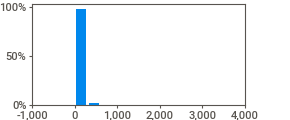
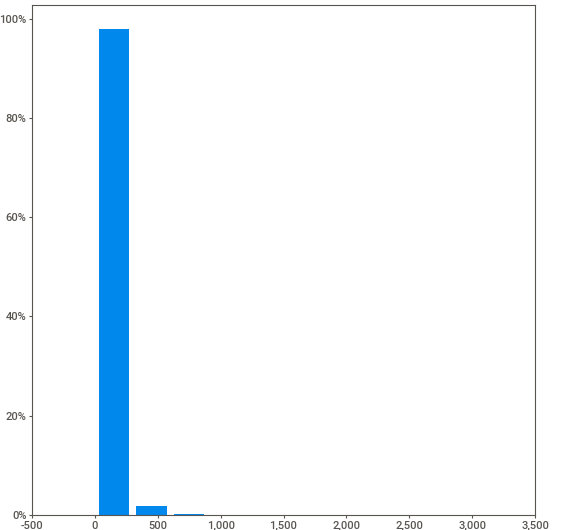
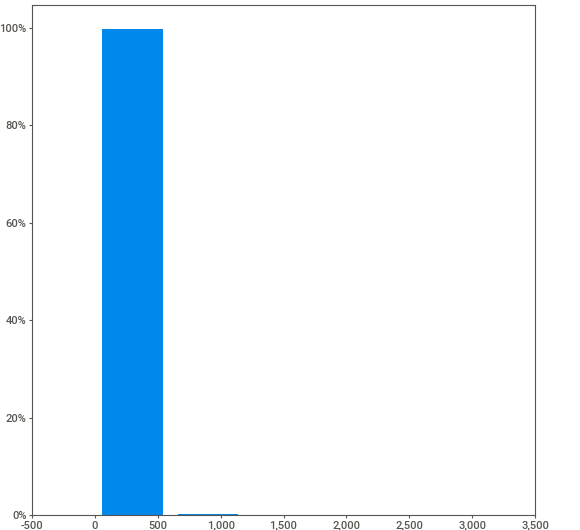
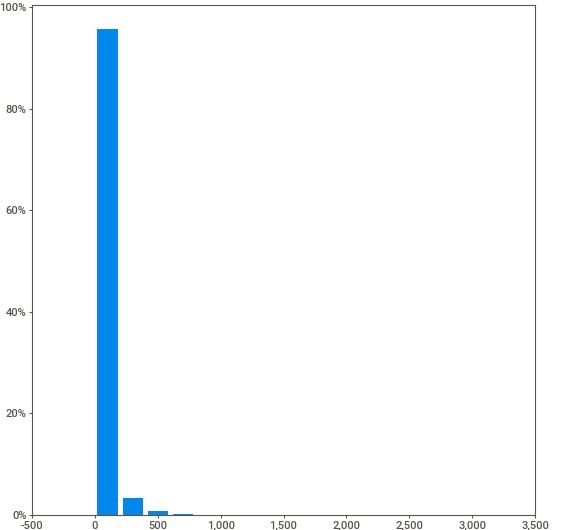
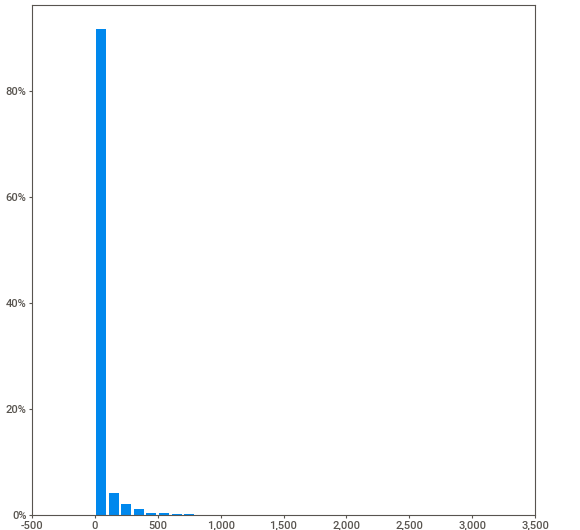
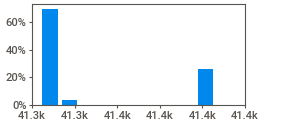
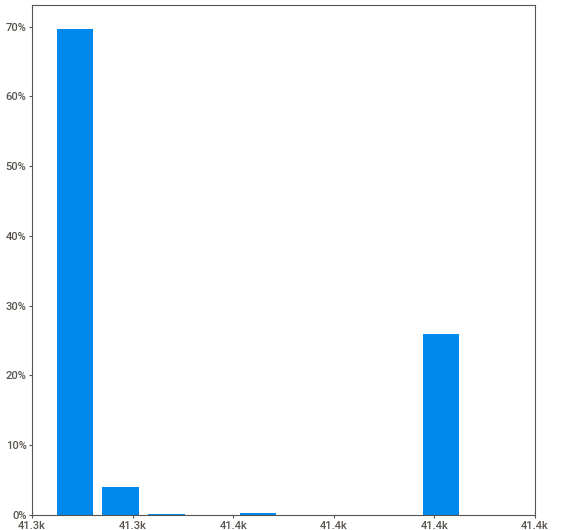
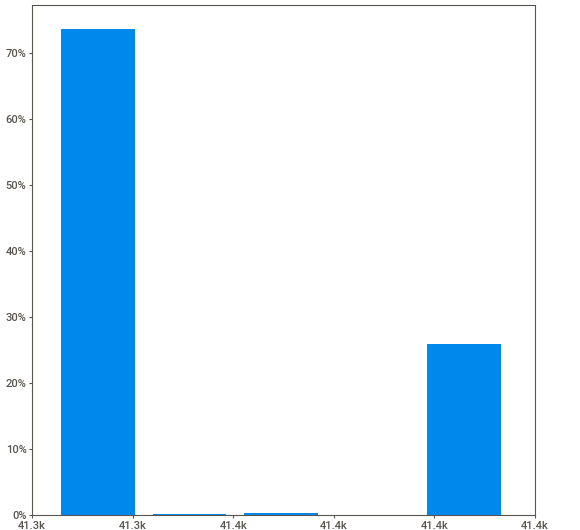
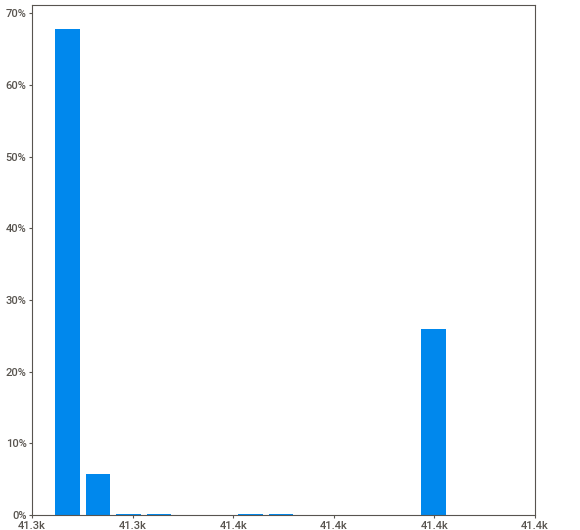
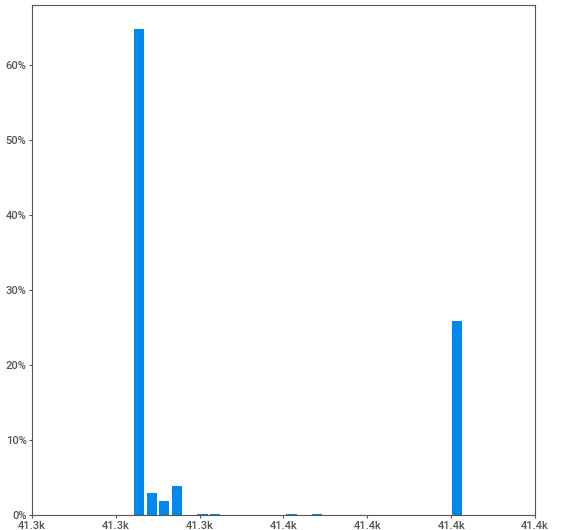
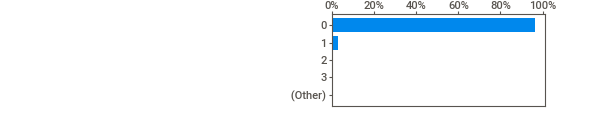
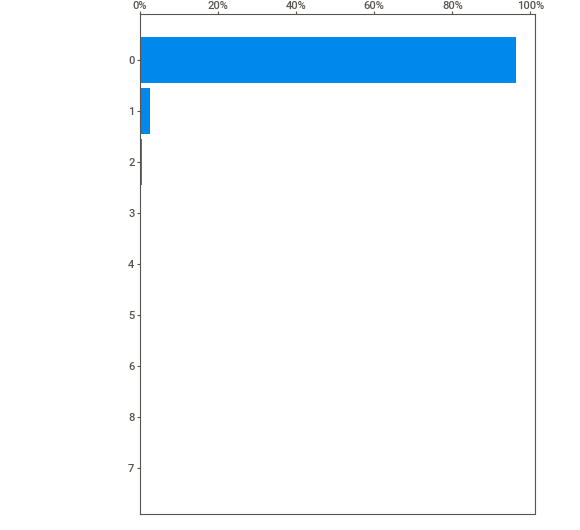
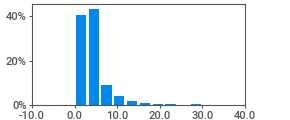
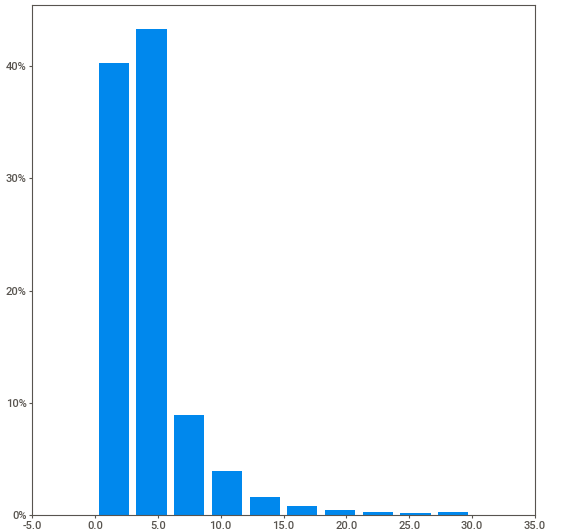
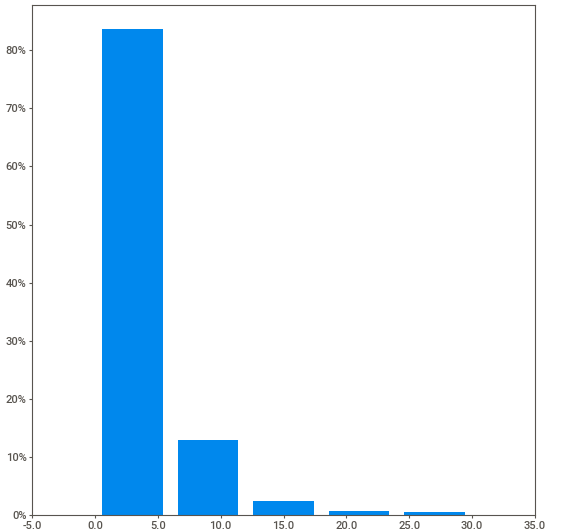
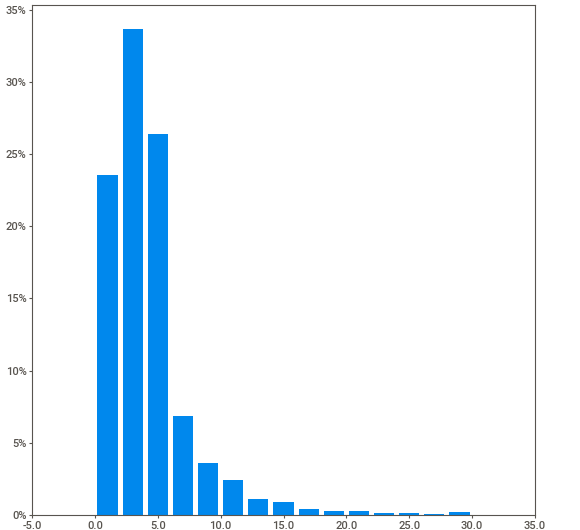
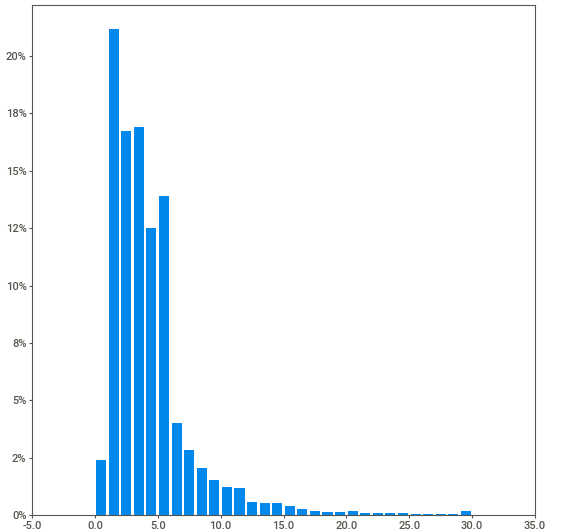
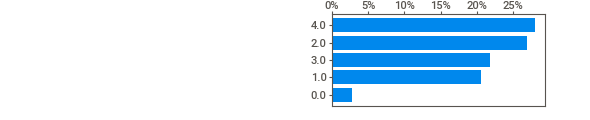
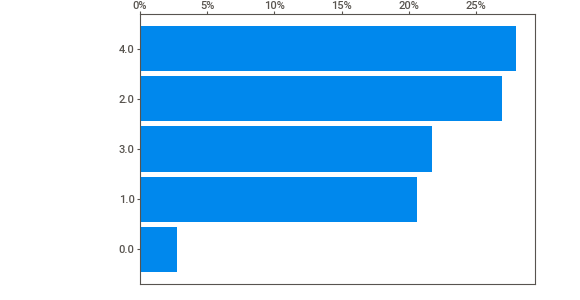
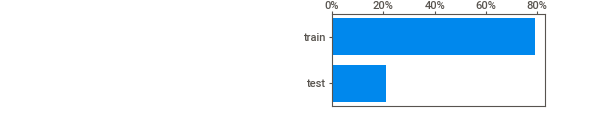
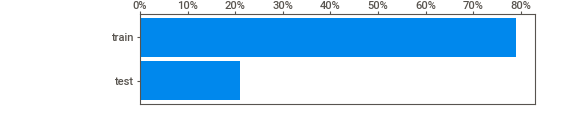
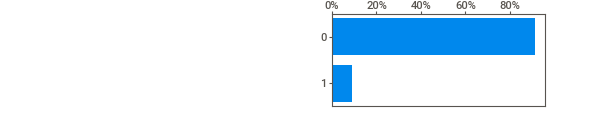
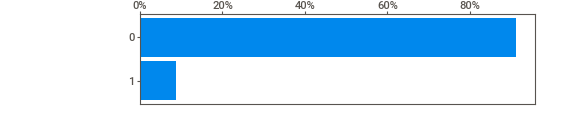
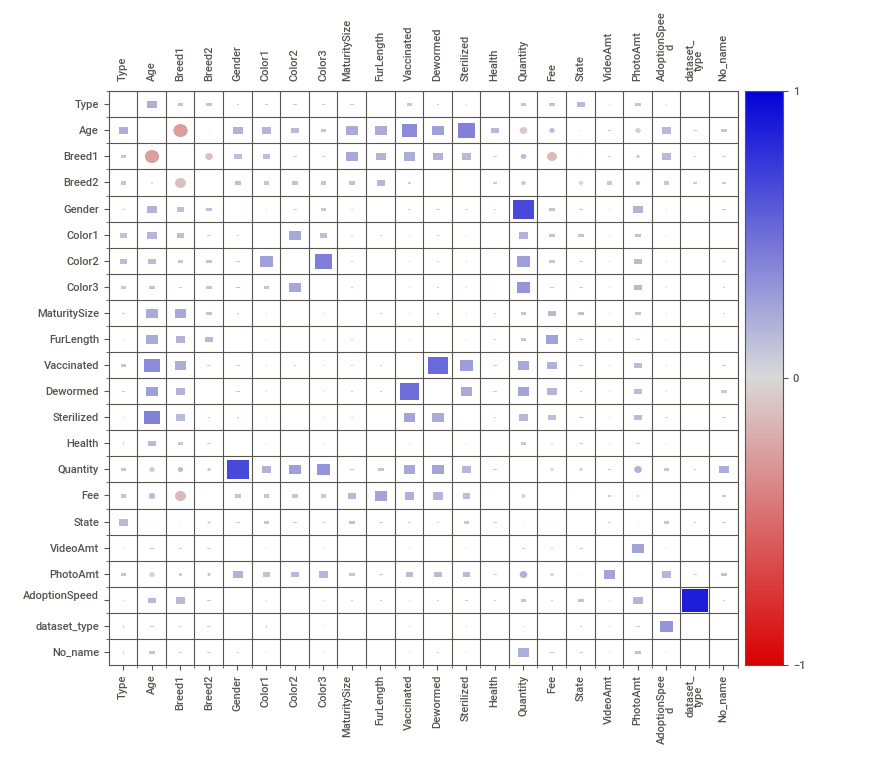
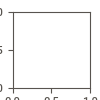

In [ ]:
#Reporte de exploración de datos consolidado
IPython.display.HTML(filename='exploración_datos.html')

##**3**. Preprocesamiento de los datos

In [ ]:
#Variable nombre
train['Name'].value_counts()

unnamed            1257
Baby                 66
Lucky                64
No Name              54
Brownie              54
                   ... 
Yily                  1
Dumb And Dumber       1
Tinker Belle          1
Black Puppies         1
Greyi                 1
Name: Name, Length: 9061, dtype: int64

En el numeral 2.2 Nombre de las mascotas, se reemplazó los valores nulos en la variable nombre por sin nombre (unnamed).

In [ ]:
#Haciendo una copia de los datos de entrenamiento para modificar las variables
train_model = train.copy()

In [ ]:
#Categorizando las variables tipo y estado
le = LabelEncoder()
train_model['Type'] = le.fit_transform(train_model['Type'])
train_model['State'] = le.fit_transform(train_model['State'])

Se categorizaron sólo las variables Tipo y Estado. No se tuvieron en cuentas las demás variables porque éstas estaban dadas por categorías

In [ ]:
#Eliminando la variable No_name
train_model.drop(['No_name'], axis=1).head(2)

Se eliminó la variable No_name que se había creado en el numeral 2.2 Nombre de las mascotas, cuando se estaba haciendo la exploración de los datos y el reemplazo de los valores nulos. Esta variable no es de interés para entrenar el modelo

En general el dataset estaba organizado, excepto por unos datos nulos que se escontraron en la variable nombre. Con esto se logra concluir que es un dataset apto para generar modelos de predicción

##**4**. Generación de modelos y predicción

In [ ]:
#Importar librerías para el modelamiento de los datos y las predicciones
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
#Definiendo la variable objetivo(Y) y los datos de entrenamiento(X)
X = train_model.loc[:, train_model.columns != 'AdoptionSpeed'].values
y = train_model.loc[:, train_model.columns == 'AdoptionSpeed'].values.reshape(-1)

In [ ]:
#Definiendo las variables del modelo a entrenar
X = train_model[['Type','Age','Breed1','Breed2','Gender','Color1','Color2','Color3','MaturitySize','FurLength','Vaccinated','Dewormed','Sterilized','Health','Quantity','Fee','State','VideoAmt','PhotoAmt']]

In [ ]:
#Visualización de las variables del modelo a entrenar
X.head()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt
0,1,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,2,0,1.0
1,1,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,12,0,2.0
2,0,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,2,0,7.0
3,0,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,12,0,8.0
4,0,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,2,0,3.0


In [ ]:
#Variable objetivo
y = train_model['AdoptionSpeed']

In [ ]:
#Partición de los datos en entrenamiento(70%) y test(30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Se utilizarán diferentes modelos para entrenar y predecir los datos. Además, calcularán dos medidas de desempeño para los modelos que se están estudiando, las cuales se definen a continuación:

- Una de las medidas elegidas para la evaluación de los modelos es el "F1 score" el cual es un promedio ponderado de la precisión y la exhaustividad 

- La segunda medida elegida es "accuracy_score", y mide el porcentaje de casos en los cuales el modelo ha acertado, puede ser engañoso porque puede hacer parecer un modelo mejor de lo que es

####**4.1** Regresión logística

In [ ]:
#Entrenamiento y predicción de la Regresión Logística
model_1 = LogisticRegression(random_state=0).fit(X_train, y_train)
predict_1 = model_1.predict(X_test)

In [ ]:
#Aplicación de la métrica de desempeño f1_score
error = f1_score(y_test, predict_1, average='macro')
error

0.21746754750887537

In [ ]:
##Aplicación de la métrica de desempeño accuracy_score
error_1 = accuracy_score(y_test, predict_1)
error_1

0.33459315251222765

In [ ]:
#Creación de informe sobre las principales métricas de clasificación 
print(classification_report(y_test, predict_1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       106
           1       0.27      0.04      0.07       915
           2       0.30      0.39      0.34      1200
           3       0.35      0.15      0.21       973
           4       0.36      0.65      0.46      1304

    accuracy                           0.33      4498
   macro avg       0.25      0.25      0.22      4498
weighted avg       0.31      0.33      0.29      4498



Para el primer modelo se plantean una regresión logística con los variables elegidas para el modelo.

Tal como se indicó en la descripción inicial el accuracy da un valor mayor porque es menos riguroso que el f1_score

####**4.2** Regresión Logística normalizada

In [ ]:
#Normalización los datos 
sc = StandardScaler()
X_train_t = sc.fit_transform(X_train)
X_test_t = sc.transform(X_test)

Se normalizaron los datos para ponerlos en una misma escala 

In [ ]:
#Entrenamiento y predicción de la Regresión Logística después de normalizar los datos
model_2 = LogisticRegression(random_state=0).fit(X_train_t, y_train)
predict_2 = model_2.predict(X_test_t)

In [ ]:
##Aplicación de las métricas de desempeño f1_score y accuracy_score
error_2_1 = f1_score(y_test, predict_2, average='macro')
error_2_2 = accuracy_score(y_test, predict_2)
error_2_1,error_2_2

(0.25007695355916104, 0.34104046242774566)

In [ ]:
#Creación de informe sobre las principales métricas de clasificación 
print(classification_report(y_test, predict_2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       106
           1       0.30      0.22      0.25       915
           2       0.30      0.35      0.32      1200
           3       0.34      0.15      0.21       973
           4       0.39      0.59      0.47      1304

    accuracy                           0.34      4498
   macro avg       0.26      0.26      0.25      4498
weighted avg       0.33      0.34      0.32      4498



Como se puede evidenciar, la normalización de los datos mejora las medidas de desempeño en ambos, pero más en f1_score debido a que este indicador castiga menos el modelo que el accuracy_score

####**4.3** Decision Tree Classifier

In [ ]:
#Entrenamiento y predicción del modelo Decision Tree Classifier después de normalizar los datos
model_3 = DecisionTreeClassifier(random_state=0).fit(X_train_t, y_train)
predict_3 = model_3.predict(X_test_t)

In [ ]:
#Aplicación de las métricas de desempeño f1_score y accuracy_score
error_3_1 = f1_score(y_test, predict_3, average='macro')
error_3_2 = accuracy_score(y_test, predict_3)
error_3_1,error_3_2

(0.2901702265026368, 0.33970653623832814)

In [ ]:
#Creación de informe sobre las principales métricas de clasificación 
print(classification_report(y_test, predict_3))

              precision    recall  f1-score   support

           0       0.08      0.09      0.08       106
           1       0.31      0.31      0.31       915
           2       0.32      0.34      0.33      1200
           3       0.29      0.30      0.29       973
           4       0.46      0.41      0.43      1304

    accuracy                           0.34      4498
   macro avg       0.29      0.29      0.29      4498
weighted avg       0.35      0.34      0.34      4498



Para este modelo el porcentaje de casos que se ha acertado con la medida de accuracy es del 0.24, mucho menor que el modelo de regresión logística, y un 0.20 para la medida f1

####**4.4** Decision Tree Classifier con hiperparámetros

In [ ]:
#Función para determinar la profundidad máxima del árbol
def random_forest(X,y,X_t,y_t):
  score_1 = []
  score_2 = []
  max_d = range(1,35,2)
  for i in max_d  :
    clf = RandomForestClassifier(max_depth=i,random_state=4)
    clf.fit(X,y)
    predict = clf.predict(X_t)
    error_f = f1_score(y_t,predict, average='macro')
    error_a = accuracy_score(y_t,predict)
    score_1.append(error_f)
    score_2.append(error_a)
  return score_1, score_2

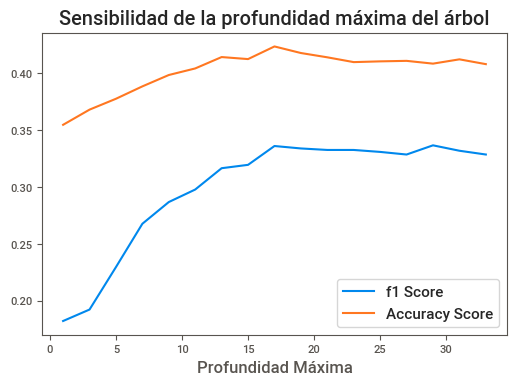

In [ ]:
#Gráfico de la Sensibilidad de la profundidad máxima del árbol
error_funcion = random_forest(X_train,y_train,X_test,y_test)
error_funcion
max_d = range(1,35,2)
plt.plot(max_d,error_funcion[0], label='f1 Score')
plt.plot(max_d,error_funcion[1], label='Accuracy Score')
plt.xlabel('Profundidad Máxima')
plt.title('Sensibilidad de la profundidad máxima del árbol')
plt.legend()
plt.show()

Con la gráfica se identificó cual debía ser la profundidad máxima del árbol para cada métrica utiliza, tanto para el f1 como para el accuracy

In [ ]:
#Entrenamiento del modelo Decision Tree Classifier sin normalizar los datos
dt = DecisionTreeClassifier(criterion='gini')
params_dt = {'max_depth': range(15,20), 'max_features': range(19,35)}
gs_dt = GridSearchCV(estimator=dt,
                     param_grid=params_dt,
                     scoring='accuracy',
                     n_jobs=2,
                     cv=5, refit=True,
                     return_train_score=False)
gs_dt.fit(X_train,y_train)
gs_dt.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=19, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Predicción del modelo Decision Tree Classifier sin normalizar los datos
y_pred = gs_dt.best_estimator_.predict(X_test)

In [ ]:
#Aplicación de las métricas de desempeño f1_score y accuracy_score
error_4_1 = f1_score(y_test, y_pred, average='macro')
error_4_2 = accuracy_score(y_test, y_pred)
error_4_1,error_4_2

(0.29645842758294544, 0.35771453979546464)

In [ ]:
#Creación de informe sobre las principales métricas de clasificación 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.10      0.08      0.09       106
           1       0.31      0.31      0.31       915
           2       0.32      0.38      0.35      1200
           3       0.29      0.22      0.25       973
           4       0.49      0.50      0.50      1304

    accuracy                           0.36      4498
   macro avg       0.30      0.30      0.30      4498
weighted avg       0.35      0.36      0.35      4498



Para este modelo el porcentaje de casos que se ha acertado con la medida de accuracy es del 0.34, mucho menor que el modelo de Decision Tree Classifier sin hiperparámetros, y un 0.28 para la medida de desempeño f1

####**4.5** Random Forest Classifier

In [ ]:
#Entrenamiento y predicción del modelo Random Forest Classifier sin normalizar los datos
model_5 = RandomForestClassifier(n_jobs=2, random_state=0).fit(X_train,y_train)
predict_5 = model_5.predict(X_test)

In [ ]:
#Aplicación de las métricas de desempeño f1_score y accuracy_score
error_5_1 = f1_score(y_test, predict_5, average='macro')
error_5_2 = accuracy_score(y_test, predict_5)
error_5_1,error_5_2

(0.32908635078522497, 0.4081814139617608)

In [ ]:
#Creación de informe sobre las principales métricas de clasificación 
print(classification_report(y_test, predict_5))

              precision    recall  f1-score   support

           0       0.20      0.04      0.06       106
           1       0.35      0.36      0.36       915
           2       0.35      0.36      0.36      1200
           3       0.36      0.27      0.31       973
           4       0.51      0.62      0.56      1304

    accuracy                           0.41      4498
   macro avg       0.36      0.33      0.33      4498
weighted avg       0.40      0.41      0.40      4498



Para el modelo de random forest classifier dío una puntuación f1 de 0.32 y un puntaje de 0.39 para accuracy, mucho mejor que los modelos anteriormente evaluados. Aunque lo ideal es que se acerque al 1.

####**4.6** Random Forest Classifier con hiperparámetros

In [ ]:
#Entrenamiento del modelo Random Forest Classifier sin normalizar los datos
rf = RandomForestClassifier(criterion='gini',n_estimators=100)
param_grid_rf = {'max_depth': range(15,20), 'max_features': range(19,35)}
rs_rf = GridSearchCV(estimator=rf,
                           param_grid=param_grid_rf,
                           scoring='accuracy',
                           n_jobs=2,
                           cv=5, refit=True, return_train_score=False)
rs_rf.fit(X_train,y_train)
rs_rf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features=19,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Predicción del modelo Random Forest Classifier sin normalizar los datos
y_pred_1 = rs_rf.best_estimator_.predict(X_test)

In [ ]:
#Aplicación de las métricas de desempeño f1_score y accuracy_score
error_6_1 = f1_score(y_test, y_pred_1, average='macro')
error_6_2 = accuracy_score(y_test, y_pred_1)
error_6_1,error_6_2

(0.3283075518286625, 0.4130724766562917)

In [ ]:
#Creación de informe sobre las principales métricas de clasificación 
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.23      0.03      0.05       106
           1       0.37      0.35      0.36       915
           2       0.35      0.42      0.38      1200
           3       0.38      0.24      0.29       973
           4       0.51      0.61      0.56      1304

    accuracy                           0.41      4498
   macro avg       0.37      0.33      0.33      4498
weighted avg       0.40      0.41      0.40      4498



Después de entrenar los datos con los diferentes modelos, se encuentra que el modelo que tiene mejor rendimiento es el Random Forest Classifier con la medida de desempeño de accuracy, ya que la puntiación de f1 disminuye unas décimas. 

El modelo tiene un porcentaje de acierto del 39.44% sobre la predicción de los datos. No obstante se deben analizar otras métricas y utilizar otros modelos para obtener un mayor acierto sobre la velocidad de adopción de las mascotas en sus 5 etapas, ya que sigue siendo muy bajo ese porcentaje de acierto.

Los pasos a seguir para el próximo semestre son mejorar el modelo actual con modelos de clasificación oridinal y regresión logistica ordinal para los datos tabulares, esto teniendo en cuenta que la variable respuesta corresponde a una categoría ordinal donde el valor asignado corresponde a una medida de tiempo ordenada, de igual forma se inyectará al modelo información asociada a imágenes y sentimientos (descripciones asociadas a los animales), esto con el fin de mejorar la predicción asociada a la velocidad de adopción.

####**4.7** Predicción de los modelos clásicos de Machine Learning con Lazypredict

In [ ]:
#Partición de los datos en entrenamiento(70%) y test(30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [ ]:
#Entrenando todos los modelos
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None, predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [01:19<00:00,  2.75s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.42,0.33,None,0.40,1.58
RandomForestClassifier,0.40,0.33,None,0.39,1.96
XGBClassifier,0.40,0.32,None,0.39,5.37
BaggingClassifier,0.38,0.32,None,0.37,0.50
ExtraTreesClassifier,0.38,0.31,None,0.37,2.27
AdaBoostClassifier,0.39,0.30,None,0.37,0.66
DecisionTreeClassifier,0.34,0.30,None,0.34,0.12
SVC,0.38,0.29,None,0.36,14.56
QuadraticDiscriminantAnalysis,0.35,0.29,None,0.34,0.07


####5. Partición de las imágenes por clase de velocidad de adopción

In [ ]:
#Importando las librerías
import os, os.path
import os
import shutil

In [ ]:
#Haciendo una copia de los datos de entrenamiento
train_images = train.copy()
train_images = train_images[["PetID", "PhotoAmt", "AdoptionSpeed"]]
train_images.head(10)

,PetID,PhotoAmt,AdoptionSpeed
0,86e1089a3,1.0,2
1,6296e909a,2.0,0
2,3422e4906,7.0,3
3,5842f1ff5,8.0,2
4,850a43f90,3.0,2
5,d24c30b4b,2.0,2
6,1caa6fcdb,3.0,1
7,97aa9eeac,9.0,3
8,c06d167ca,6.0,1
9,7a0942d61,2.0,4


In [ ]:
#Enlazando la ruta de la carpeta donde se encuentran las imágenes
path, dirs, files = next(os.walk("/content/gdrive/My Drive/MONOGRAFIA/DATASET/train_images"))
file_count = len(files)
file_count 

58311

In [ ]:
##Enlazando la ruta de la carpeta donde se encuentran las imágenes
contenido = os.listdir('/content/gdrive/My Drive/MONOGRAFIA/DATASET/train_images')
contenido

In [ ]:
#Instalando pytest-shutil
! pip install pytest-shutil

In [ ]:
#Creación de algoritmo para pasar las imágenes por clases 
list_images = train_images.to_numpy().tolist()
TRAIN_PATH = '/content/gdrive/My Drive/MONOGRAFIA/DATASET/train_images'
contenido = os.listdir(TRAIN_PATH)

new_list = []
for i in contenido:
  new_list.append(i[0:9])

def retrieve_class(image_details):
    return f'Clase {image_details[2]}'


for image_id in new_list:
  for image_details in list_images: # image_details => [id, amount_ph, adopt_speed]
    if image_details[0] == image_id:
      destination_google_path = '/content/gdrive/My Drive/MONOGRAFIA/DATASET/Imagenes_Org/' + retrieve_class(image_details)
      for full_image_id in contenido:
        if full_image_id[0:9] == image_id:
          origin_google_path = f"{TRAIN_PATH}/{full_image_id}"
          destination_google_path_with_id = f"{destination_google_path}/{full_image_id}"
          shutil.copy(origin_google_path, destination_google_path_with_id)

In [ ]:
#Cantidad de imágenes en la clase cero
path, dirs, files = next(os.walk("/content/gdrive/My Drive/MONOGRAFIA/DATASET/Imagenes_Org/Clase 0"))
clase_cero = len(files)
clase_cero

1363

In [ ]:
#Cantidad de imágenes en la clase uno
path, dirs, files = next(os.walk("/content/gdrive/My Drive/MONOGRAFIA/DATASET/Imagenes_Org/Clase 1"))
clase_uno = len(files)
clase_uno

11517

In [ ]:
#Cantidad de imágenes en la clase dos
path, dirs, files = next(os.walk("/content/gdrive/My Drive/MONOGRAFIA/DATASET/Imagenes_Org/Clase 2"))
clase_dos = len(files)
clase_dos

16438

In [ ]:
#Cantidad de imágenes en la clase tres
path, dirs, files = next(os.walk("/content/gdrive/My Drive/MONOGRAFIA/DATASET/Imagenes_Org/Clase 3"))
clase_tres = len(files)
clase_tres

15059

In [ ]:
#Cantidad de imágenes en la clase cuatro
path, dirs, files = next(os.walk("/content/gdrive/My Drive/MONOGRAFIA/DATASET/Imagenes_Org/Clase 4"))
clase_cuatro = len(files)
clase_cuatro

13934

In [ ]:
#Total de imágenes
count_total_class = clase_cero + clase_uno + clase_dos + clase_tres + clase_cuatro
count_total_class 

58311